Привет, меня зовут Артем Носенко и я буду проверять твой проект.
<br>Небольшая вступительная часть и начнем работу)
<br> Если не против, то предлагаю общаться на «ты». Если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — не указать на совершенные ошибки, а поделиться своим опытом и помочь сделать твой проект лучше. Для этого я буду использовать разный стиль оформления комментариев.
<div class="alert alert-block alert-success">
✔️ Все хорошо.
</div>

<div class="alert alert-warning">
⚠️ Критических замечаний нет, но есть возможность сделать твою работу лучше.
</div>

<div class="alert alert-block alert-danger">
❌ Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».


# Описание проекта
Цель: Предсказать, какой банковский продукт предложить клиенту

Основные задачи: Анализ данных о клиентах, определение важных метрик, моделирование, продуктивизация модели, настройка мониторинга и дообучения.

Задача - сделать сервис рекомендаций банковских продуктов на основе данных по клиентам

# Признаки

Названия признаков
 - fecha_dato	Колонка для разделения таблицы
 - ncodpers	Идентификатор пользователя
 - ind_empleado	Статус занятости:- A — трудоустроен- B — безработный, раньше работал- F — иждивенец- N — безработный- P — пассивный (статус не определён)
 - pais_residencia	Страна резидентства
 - sexo	Пол
 - age	Возраст
 - fecha_alta	Дата, когда клиент впервые заключил договор в банке
 - ind_nuevo	1, если клиент зарегистрировался за последние 6 месяцев
 - antiguedad	Стаж клиента (в месяцах)
 - indrel	1 — первичный клиент, 99 — первичный клиент в течении месяца, но не в конце
 - ult_fec_cli_1t	Последняя дата, когда клиент был премиальным
 - indrel_1mes	Тип клиента в начале месяца:- 1 — премиальный- 2 — собственник- P — потенциальный- 3 — раньше был премиальным- 4 — раньше был собственником
 - tiprel_1mes	Тип клиента в начале месяца:- A — активный- I — неактивный- P — бывший- R — потенциальный
 - indresi	Если страна проживания совпадает со страной банка
 - indext	Если страна рождения клиента отличается от страны банка
 - conyuemp	1, если клиент супруг(а) работника
 - canal_entrada	Канал, по которому пришел пользователь
 - indfall	Индекс актуальности счёта (англ. Deceased index, N/S)
 - tipodom	Тип адреса (1 — основной адрес)
 - cod_prov	Код провинции (адреса клиента)
 - nomprov	Имя провинции
 - ind_actividad_cliente	Активность пользователя (1 — активный, 0 — неактивный)
 - renta	Доход домохозяйства
 - segmento	Сегментация: 1 — VIP, 2 — Обыкновенные 3 — выпускники колледжей

<b>Комментарий от ревьюера v2</b>
<div class="alert alert-block alert-success">
✔️ Отлично, что добавляешь описание признаков. Это хорошая практика!
</div>

# 1 - Загрузка и первые результаты профилирования данных

In [302]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [303]:
import warnings
warnings.filterwarnings('ignore')

In [304]:
import pandas as pd
import seaborn as sns
import sklearn.metrics
import sklearn.preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pickle
from implicit.als import AlternatingLeastSquares
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,KBinsDiscretizer


from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import precision_score, recall_score, f1_score
import scipy
import os
import mlflow

<b>Комментарий от ревьюера v1</b>


<div class="alert alert-warning">

⚠️ `SEED` стоит зафиксировать в самом начале. Это позволит тебе добиваться воспроизводимости результатов. 

</div>

In [305]:
import dotenv
from dotenv import load_dotenv

In [306]:

load_dotenv() # подгружаем .env

True

In [307]:
df = pd.read_csv('/home/mle-user/mle_projects/mle-pr-final/data/train_ver2.csv',parse_dates = ['fecha_dato','fecha_alta','ult_fec_cli_1t'],low_memory=False,keep_default_na=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   fecha_dato             datetime64[ns]
 1   ncodpers               int64         
 2   ind_empleado           object        
 3   pais_residencia        object        
 4   sexo                   object        
 5   age                    object        
 6   fecha_alta             datetime64[ns]
 7   ind_nuevo              object        
 8   antiguedad             object        
 9   indrel                 object        
 10  ult_fec_cli_1t         datetime64[ns]
 11  indrel_1mes            object        
 12  tiprel_1mes            object        
 13  indresi                object        
 14  indext                 object        
 15  conyuemp               object        
 16  canal_entrada          object        
 17  indfall                object        
 18  tipodom             

MLFLOW

In [308]:
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = "SPRINT_FINAL"

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net"
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID")
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY")

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

if mlflow.get_experiment_by_name(name=EXPERIMENT_NAME):
    experiment_id = dict(mlflow.get_experiment_by_name(name=EXPERIMENT_NAME))['experiment_id']
    mlflow.set_experiment(experiment_id=experiment_id)
else:
    mlflow.set_experiment(EXPERIMENT_NAME)
    experiment_id = dict(mlflow.get_experiment_by_name(name=EXPERIMENT_NAME))['experiment_id']
    mlflow.set_experiment(experiment_id=experiment_id)


2025/03/03 11:36:30 INFO mlflow.tracking.fluent: Experiment with name 'SPRINT_FINAL' does not exist. Creating a new experiment.


In [309]:
users=df['ncodpers'].drop_duplicates()
users_sample=users.sample(100000, random_state=0)
df=df[df['ncodpers'].isin(users_sample)]

In [310]:
df.head(10).to_csv('/home/mle-user/mle_projects/mle-pr-final/data/df_sample.csv')

Изучаю содержимое датафрейма

TARGET
 - ind_ahor_fin_ult1	Сберегательный счёт
 - ind_aval_fin_ult1	Банковская гарантия
 - ind_cco_fin_ult1	Текущие счета
 - ind_cder_fin_ult1	Деривативный счёт
 - ind_cno_fin_ult1	Зарплатный проект
 - ind_ctju_fin_ult1	Детский счёт
 - ind_ctma_fin_ult1	Особый счёт 3
 - ind_ctop_fin_ult1	Особый счёт
 - ind_ctpp_fin_ult1	Особый счёт 2
 - ind_deco_fin_ult1	Краткосрочный депозит
 - ind_deme_fin_ult1	Среднесрочный депозит
 - ind_dela_fin_ult1	Долгосрочный депозит
 - ind_ecue_fin_ult1	Цифровой счёт
 - ind_fond_fin_ult1	Денежный средства
 - ind_hip_fin_ult1	Ипотека
 - ind_plan_fin_ult1	Пенсионный план
 - ind_pres_fin_ult1	Кредит
 - ind_reca_fin_ult1	Налоговый счёт
 - ind_tjcr_fin_ult1	Кредитная карта
 - ind_valo_fin_ult1	Ценные бумаги
 - ind_viv_fin_ult1	Домашний счёт
 - ind_nomina_ult1	Аккаунт для выплаты зарплаты
 - ind_nom_pens_ult1	Аккаунт для пенсионных обязательств
 - ind_recibo_ult1	Дебетовый аккаунт

In [311]:
a1=df['ncodpers'].count()
a2=df['ncodpers'].nunique()
print(f'всего записей - {a1},уникальных клиентов - {a2}')

period_start=df['fecha_dato'].min()
period_end=df['fecha_dato'].max()
print(f'начало периода - {period_start},конец периода - {period_end}')
print('')

print('категориальные признаки')
emp_status=df['ind_empleado'].unique()
print(f'статус занятости - {emp_status}') #есть пропуски, A — трудоустроен- B — безработный, раньше работал- F — иждивенец- N — безработный- P — пассивный (статус не определён)

male_female=df['sexo'].unique()
print(f'значения пола - {male_female}') # есть пропуски, Н - мужчика, V - женщина

new_client=df['ind_nuevo'].unique()
print(f'признак новый клиент {new_client}') #есть пропуски

client_type1=df['indrel_1mes'].unique()
print(f'тип клиента 1{client_type1}') #есть пропуски, необходимо сделать replace

client_type2=df['tiprel_1mes'].unique() 
print(f'тип клиента 2{client_type2}') #есть пропуски, A — активный- I — неактивный- P — бывший- R — потенциальный

resident=df['indresi'].unique()
print(f'резидент - {resident}') #есть пропуски, S (Yes) or N (No) 

origin=df['indext'].unique()
print(f'рожден в стране - {origin}') #есть пропуски, S (Yes) or N (No) 

new_client_=df['indrel'].unique()
print(f'первичный клиент- {new_client_}') #есть пропуски

connect=df['conyuemp'].unique()
print(f'родственник- {connect}') #есть пропуски

channel=df['canal_entrada'].unique()
print(f'канал- {channel}') #есть пропуски

deseased=df['indfall'].unique()
print(f'индекс- {deseased}') #есть пропуски, S (Yes) or N (No)

dom=df['tipodom'].unique()
print(f'тип адреса- {dom}') #есть пропуски

segment=df['segmento'].unique()
print(f'сегмент- {segment}') #есть пропуски

act=df['ind_actividad_cliente'].unique()
print(f'признак активности- {act}')#есть пропуски

всего записей - 1426639,уникальных клиентов - 100000
начало периода - 2015-01-28 00:00:00,конец периода - 2016-05-28 00:00:00

категориальные признаки
статус занятости - ['N' '' 'A' 'B' 'F']
значения пола - ['H' 'V' '']
признак новый клиент [' 0' 'NA' ' 1']
тип клиента 1['1' '1.0' '' '3' '3.0' '4' '2.0' 'P' '2' '4.0']
тип клиента 2['A' 'I' '' 'P' 'R']
резидент - ['S' '' 'N']
рожден в стране - ['N' 'S' '']
первичный клиент- [' 1' '99' 'NA']
родственник- ['' 'N']
канал- ['KHE' 'KFC' 'KHD' 'KFA' 'KAT' 'KHC' 'RED' '' 'KHM' 'KAZ' 'KHK' 'KHL'
 'KEH' 'KHA' 'KAE' 'KAB' 'KAR' 'KAQ' 'KAA' 'KCC' 'KGX' 'KFG' 'KGV' 'KGY'
 'KAG' 'KFP' 'KFK' 'KFD' 'KAI' 'KFU' 'KFS' 'KAH' 'KAP' 'KFN' 'KAJ' 'KFJ'
 'KFL' 'KHF' 'KHN' 'KBG' 'KAY' 'KDA' 'KDE' 'KBO' 'KAC' 'KCL' 'KBZ' 'KBQ'
 'KDO' 'KDY' 'KCG' 'KBU' 'KDR' 'KDT' 'KDQ' 'KDU' 'KEC' '007' '004' 'KCD'
 'KCB' 'KBL' 'KAS' 'KAF' 'KDV' 'KES' 'KDX' 'KCK' 'KAD' 'KCE' 'KAO' 'KCA'
 '013' 'KAW' 'KBH' 'KCI' 'KEV' 'KEY' 'KCH' 'KEI' 'KCN' 'KDZ' 'KFT' 'KDP'
 'KBD' 'KCM' 'KAN' 

изучаю пропуски в категориальных признаках

In [312]:
categorial_cols=['ind_empleado','sexo','ind_nuevo','indrel_1mes','tiprel_1mes','indresi',
                 'indext','indrel','conyuemp','canal_entrada','indfall','tipodom','segmento',
                 'ind_actividad_cliente']


all=df['ncodpers'].count()
for i in range(len(categorial_cols)):
    df[categorial_cols[i]]=df[categorial_cols[i]].replace('NA','')
    result=df[categorial_cols[i]].apply(lambda x: len(x)==0).sum()
    print(f'{categorial_cols[i]} - количество пустых значений {result}, доля от всего {round(result/all,3)}')

ind_empleado - количество пустых значений 2763, доля от всего 0.002
sexo - количество пустых значений 2780, доля от всего 0.002
ind_nuevo - количество пустых значений 2763, доля от всего 0.002
indrel_1mes - количество пустых значений 15534, доля от всего 0.011
tiprel_1mes - количество пустых значений 15534, доля от всего 0.011
indresi - количество пустых значений 2763, доля от всего 0.002
indext - количество пустых значений 2763, доля от всего 0.002
indrel - количество пустых значений 2763, доля от всего 0.002
conyuemp - количество пустых значений 1426442, доля от всего 1.0
canal_entrada - количество пустых значений 19089, доля от всего 0.013
indfall - количество пустых значений 2763, доля от всего 0.002
tipodom - количество пустых значений 2763, доля от всего 0.002
segmento - количество пустых значений 19465, доля от всего 0.014
ind_actividad_cliente - количество пустых значений 2763, доля от всего 0.002


Выводы:
 - в целом по большинству полей пропусков немного
 - признак сотрудника 'conyuemp' не заполнен

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Отлично! Проведен корректный анализ!
</div>

Числовые признаки

In [313]:
df.loc[:, ['age', 'renta']] = df[['age', 'renta']].apply(pd.to_numeric, errors='coerce')

In [314]:
df[['age', 'renta']].isna().sum()

age        2763
renta    292574
dtype: int64

target columns

In [315]:
target_col = df.columns[24:49]

df.loc[:, target_col].apply(lambda x: x.unique())

ind_ahor_fin_ult1          [0, 1]
ind_aval_fin_ult1          [0, 1]
ind_cco_fin_ult1           [1, 0]
ind_cder_fin_ult1          [0, 1]
ind_cno_fin_ult1           [0, 1]
ind_ctju_fin_ult1          [0, 1]
ind_ctma_fin_ult1          [0, 1]
ind_ctop_fin_ult1          [0, 1]
ind_ctpp_fin_ult1          [0, 1]
ind_deco_fin_ult1          [0, 1]
ind_deme_fin_ult1          [0, 1]
ind_dela_fin_ult1          [0, 1]
ind_ecue_fin_ult1          [0, 1]
ind_fond_fin_ult1          [0, 1]
ind_hip_fin_ult1           [0, 1]
ind_plan_fin_ult1          [0, 1]
ind_pres_fin_ult1          [0, 1]
ind_reca_fin_ult1          [0, 1]
ind_tjcr_fin_ult1          [0, 1]
ind_valo_fin_ult1          [0, 1]
ind_viv_fin_ult1           [0, 1]
ind_nomina_ult1      [ 0,  1, NA]
ind_nom_pens_ult1    [ 0,  1, NA]
ind_recibo_ult1            [0, 1]
dtype: object

ind_nomina_ult1,ind_nom_pens_ult1 - есть пустые значения NA  

Выводы
 - надо задать корректные форматы признаков
 - в категориальных признака - есть пропуски, их немного, можно удалить
 - в числовых признаках есть пропуски в доходе - их много, надо заполнить средним значением
 - не все признаки полезны, есть странные (признак родственника не заполнен)

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ ОК!
</div>
<div class="alert alert-warning">
    
⚠️ Странный признак только один? Его видимо лучше не использовать, верно?

</div>

# 2 - EDA

## 2.1 - обработаем значения и пропуски в атрибутах датафрейма

In [316]:
events=df

In [317]:
events.loc[:, ['age', 'renta']] = events[['age', 'renta']].apply(pd.to_numeric, errors='coerce')

In [318]:
#заменяю значения
events['indresi']=events['indresi'].replace({'S': 1, 'N':0}) # признак резидента
events['indrel_1mes'] = events['indrel_1mes'].replace({'1.0': '1', '3.0':'3', '2.0':'2', '4.0':'4'}) # Тип клиента в начале месяца
events.loc[events['segmento']=='','segmento']='02 - PARTICULARES' #Сегментация
events['sexo']=events['sexo'].replace({'H': 1, 'V':2}) #Пол
events['indfall']=events['indfall'].replace({'S': 1, 'N':0}) #Индекс актуальности счёта 
events['tipodom']=events['tipodom'].replace({' 1': 1, '':0}) #Основной адрес
events['indext']=events['indext'].replace({'S': 1, 'N':0})


In [319]:
#пока закодирую пустые значения чтобы посмотреть распределение
events.loc[events['tiprel_1mes']=='','tiprel_1mes']='ND'
events.loc[events['cod_prov']=='','cod_prov']='ND'

In [320]:
#удаляю пропуски
events=events.loc[events['sexo']!='']
events=events.loc[events['indresi']!='']
events=events.loc[events['ind_empleado']!='']

In [321]:
events[['age', 'renta']].isna().sum()

age           0
renta    289794
dtype: int64

пропусков в возрасте немного, можно удалить. Пропусков в доходе много, удалять нельзя, надо будет позже заполнять пустые значения

In [322]:
events=events[~events['age'].isna()]

In [323]:
print(events['age'].isna().sum())

0


In [324]:
#заменяю значения таргетов
events['ind_nomina_ult1']=events['ind_nomina_ult1'].replace({'NA':'0',' 0':'0',' 1':'1'})
events['ind_nom_pens_ult1']=events['ind_nom_pens_ult1'].replace({'NA':'0',' 0':'0',' 1':'1'}) 
events['ind_nuevo']=events['ind_nuevo'].replace({'NA':'0',' 0':'0',' 1':'1'}) 


In [325]:
#насколько уменьшился датафрейм после чистки
len(df)-len(events)

2780

In [326]:
categorial_cols_for_EDA=['indresi','indrel_1mes','segmento',
                         'sexo','tipodom','indext','canal_entrada',
                         'indfall','ind_empleado','ind_nuevo','indrel',
                         'cod_prov','tiprel_1mes']

## 2.2 - кодирую категориальные атрибуты для расчета линейных зависимостей и построения pairplot

In [327]:
#преобразуем
# Выполняем кодирование категориального признака
for feature in categorial_cols_for_EDA:
    lab_enc = LabelEncoder()
    events[feature] = lab_enc.fit_transform(events[feature])


In [328]:
events_columns=events.columns.to_list()
events_features=events_columns[:24]

In [329]:
# Указание типов данных для столбцов
dtype_dict = {
    'fecha_dato': 'datetime64[ns]','ncodpers': 'int','ind_empleado': 'int','pais_residencia': 'category','sexo': 'int',
    'age': 'int','fecha_alta': 'datetime64[ns]','ind_nuevo': 'int','antiguedad': 'int','indrel': 'int','ult_fec_cli_1t': 'int',
    'indrel_1mes':'int','tiprel_1mes': 'int','indresi':'int','indext': 'int','canal_entrada': 'int',
    'indfall':'int','tipodom':'int','cod_prov': 'int','nomprov':'object','ind_actividad_cliente': 'int','renta': 'float','segmento': 'int',}

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Хорошо!
</div>


## 2.3 - смотрю содержимое датафрейма

In [330]:
events[events_features]=events[events_features].astype(dtype_dict)

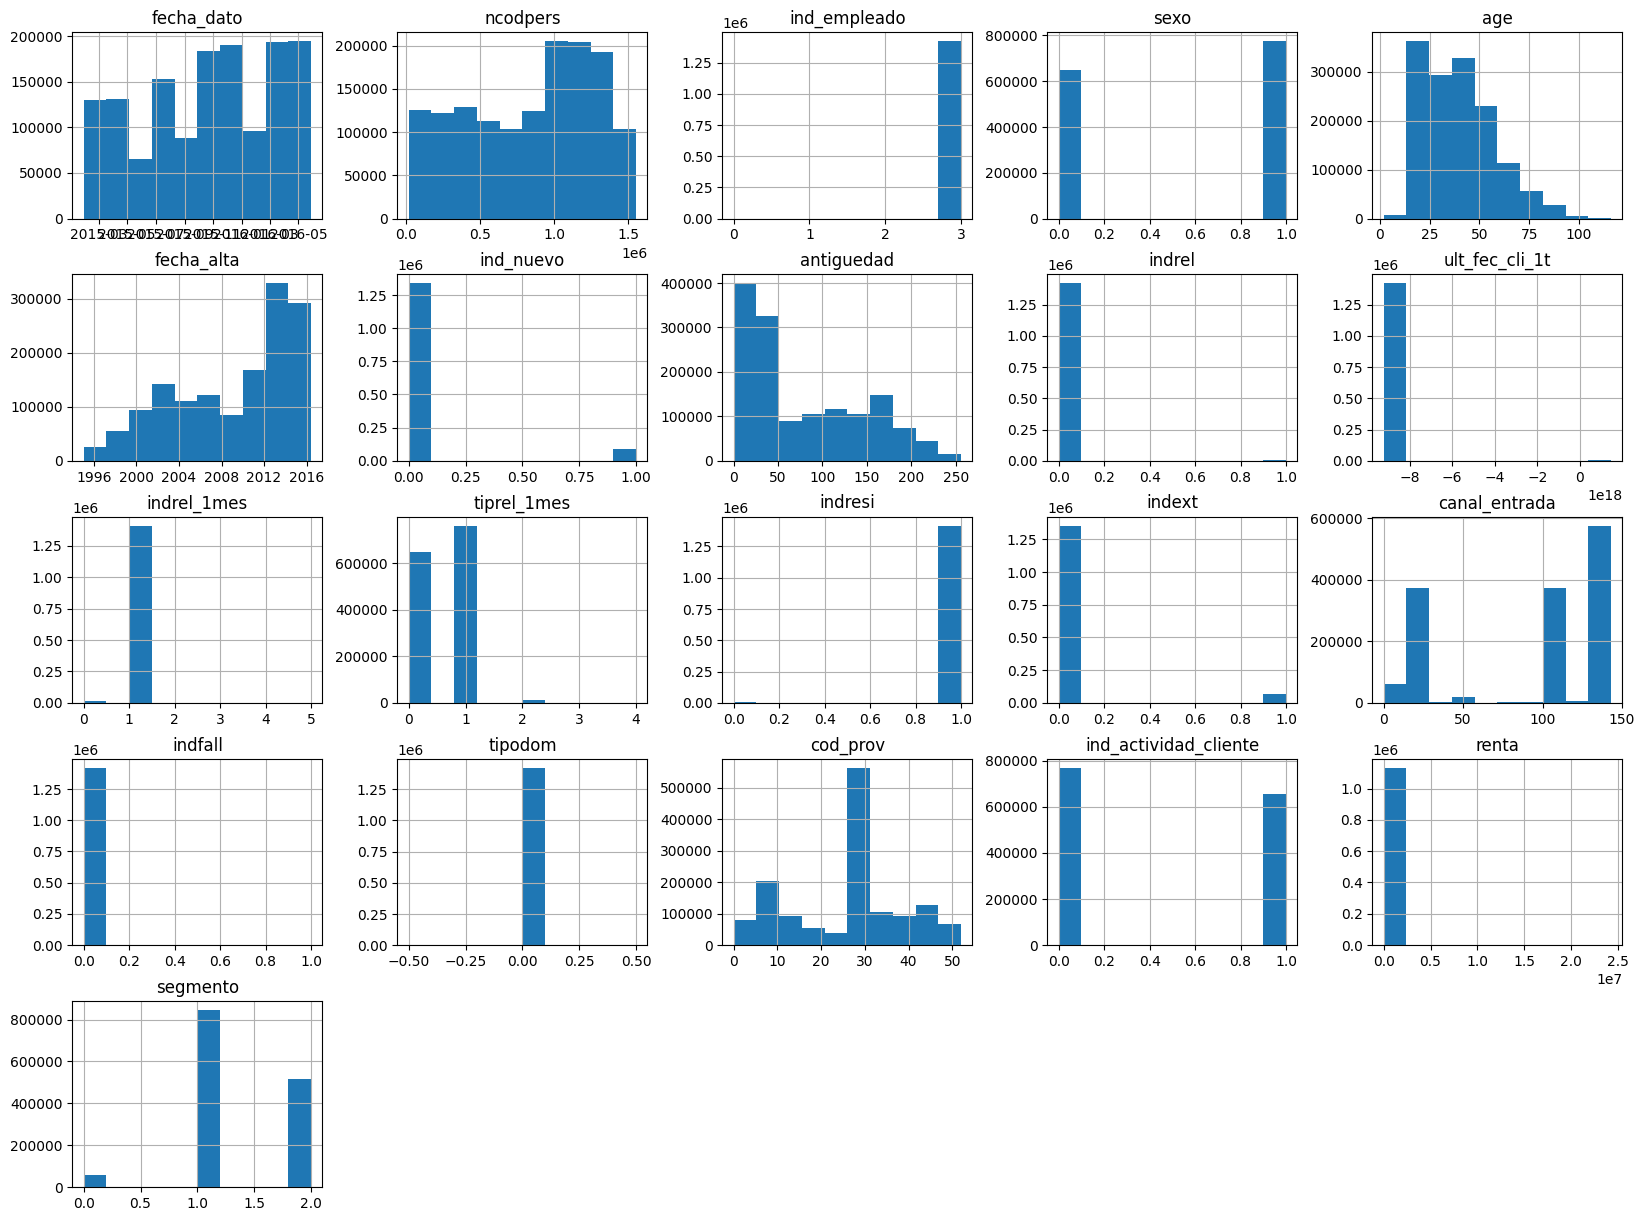

In [331]:
events[events_features].hist(figsize=(20,15))
plt.savefig("/home/mle-user/mle_projects/mle-pr-final/artifacts/figure_features.png")

смотрю распределение значений по атрибутам

Выводы
1. Полезные признаки
- Fecha_dato - бизнес растет, в данных есть некая сезонность (интересно посмотреть в разрезе по месяцам)
- sexo Пол - в выборке примерно поровну мужчин и женщин
- age Возраст - распределение похоже на нормальное, банковские продукты начинают продавать ~ c 20 лет
- fecha_alta	Дата, когда клиент впервые заключил договор в банке - основная масса новых клиентов с 2012 года
- ind_nuevo	1, если клиент зарегистрировался за последние 6 месяцев - в датафрейме до 10% всех клиентов новые
- indext	Если страна рождения клиента отличается от страны банка - в датафрейме до 10% всех клиентов эмигранты
- canal_entrada	Канал, по которому пришел пользователь - есть 3 основных канала продаж, остальные можно объединить в группу прочее
- segmento	Сегментация - есть 3 крупных сегмента
- cod_prov	Код провинции (адреса клиента) - 1 регион самый массовый, возможно уменьшить количество категорий (основной регион - да/нет)
- tiprel_1mes	Тип клиента в начале месяца - нормально заполнен
- ind_actividad_cliente	Активность пользователя

2. Неинформативные признаки
- ind_empleado Статус занятости - неинформативный признак, все значения в 1 месте сосредоточены
- indrel	1 — первичный клиент, 99 — первичный клиент в течении месяца, но не в конце - неинформативный признак
- ult_fec_cli_1t	Последняя дата, когда клиент был премиальным - пока не очень понятно как можно использовать признак
- indresi	Если страна проживания совпадает со страной банка - практически все клиенты являются резидентами
- indfall	Индекс актуальности счёта (англ. Deceased index, N/S) - малоинформативен, почти все значения нет
- nomprov	Имя провинции - дублирует код провинции
- indrel_1mes	Тип клиента в начале месяца - есть подозрение что поле заполняется некорректно, у большинства клиентов стоит признак "премиальный"
- conyuemp	1, если клиент супруг(а) работника - признак не заполнен
- tipodom - фактически 1 значение у всех

3. Выбор будущей модели
- интересно посмотреть на модель деревья решений (Большинство признаков являются категориальными)
- простая рекомендация - топ популярных продуктов (посмотреть меняются ли со временем)
- поскольку у нас несколько банковских продуктов - можно использовать коллаборативную фильтрацию ALS для персональных рекомендаций и контентные рекомендации 


<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Отличные выводы!Сформированы подробные описания признаков и их значимости!
</div>
<div class="alert alert-warning">
    
⚠️ Для наиболее подходящих алгоритмов вместо (или вместе) деревьев принятия решений я бы предложил ансамбли над этими деревьями - градиентый бустинг или случайный лес.

</div>

<div class="alert alert-warning">
    
⚠️ Выводы можно залогировать в mlflow. 

</div>


## 2.4 - убираю лишние поля

In [332]:
events_features_clean=events[events_features].drop(columns=['ind_empleado','indrel','ult_fec_cli_1t','indresi','indfall','nomprov','indrel_1mes','conyuemp','tipodom','ncodpers'])

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Принято!
</div>


## 2.5 - корреляционный анализ для выбора признаков

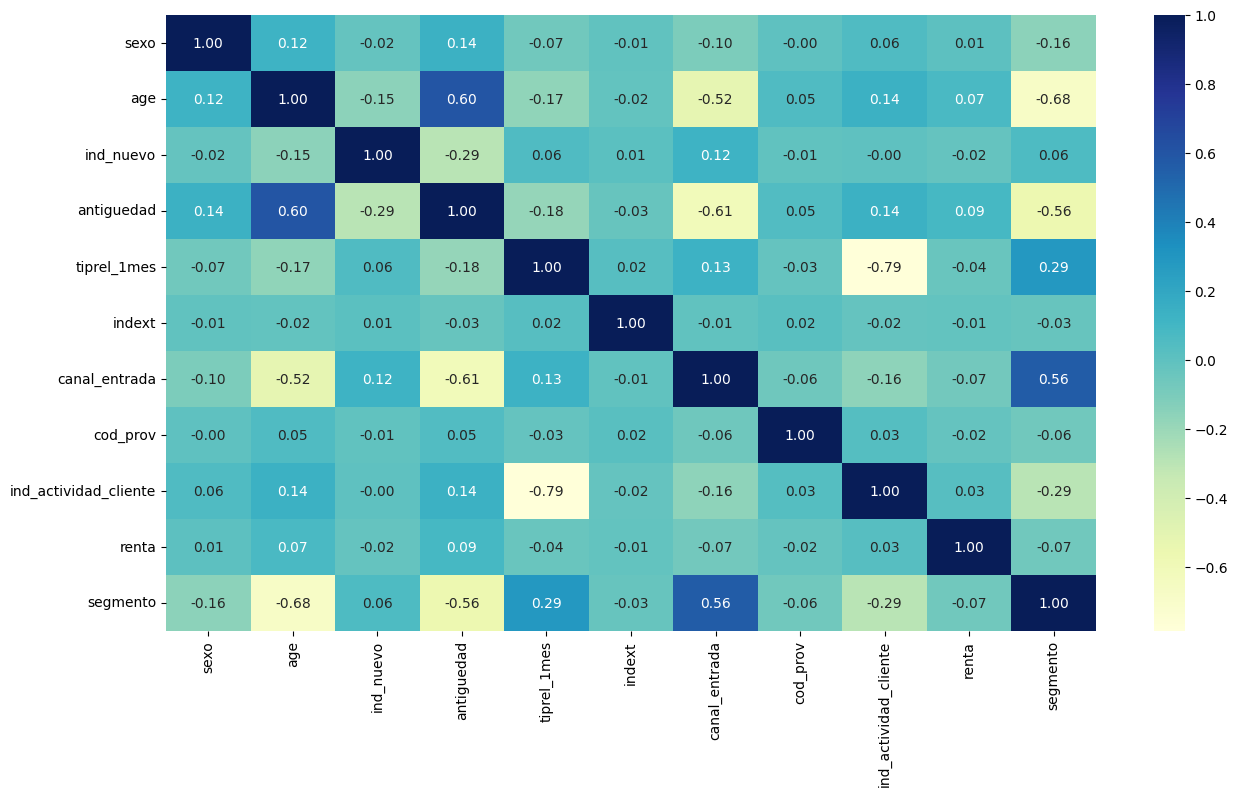

In [333]:
#корреляционный анализ для выбора признаков
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(events_features_clean.select_dtypes(['float','int']).corr(), annot=True, fmt='.2f', cmap='YlGnBu')
plt.savefig("/home/mle-user/mle_projects/mle-pr-final/artifacts/figure_heatmap.png")

Выводы - часть признаков имеют линейную зависимость
 - возраст (age) и канал оформления (canal_entrada)
 - возраст (age) и сегмент (segmento)
 - тип клиента (tiprel_1mes) и активность пользователя (ind_actividad_cliente)

 Посмотрим на них подробнее

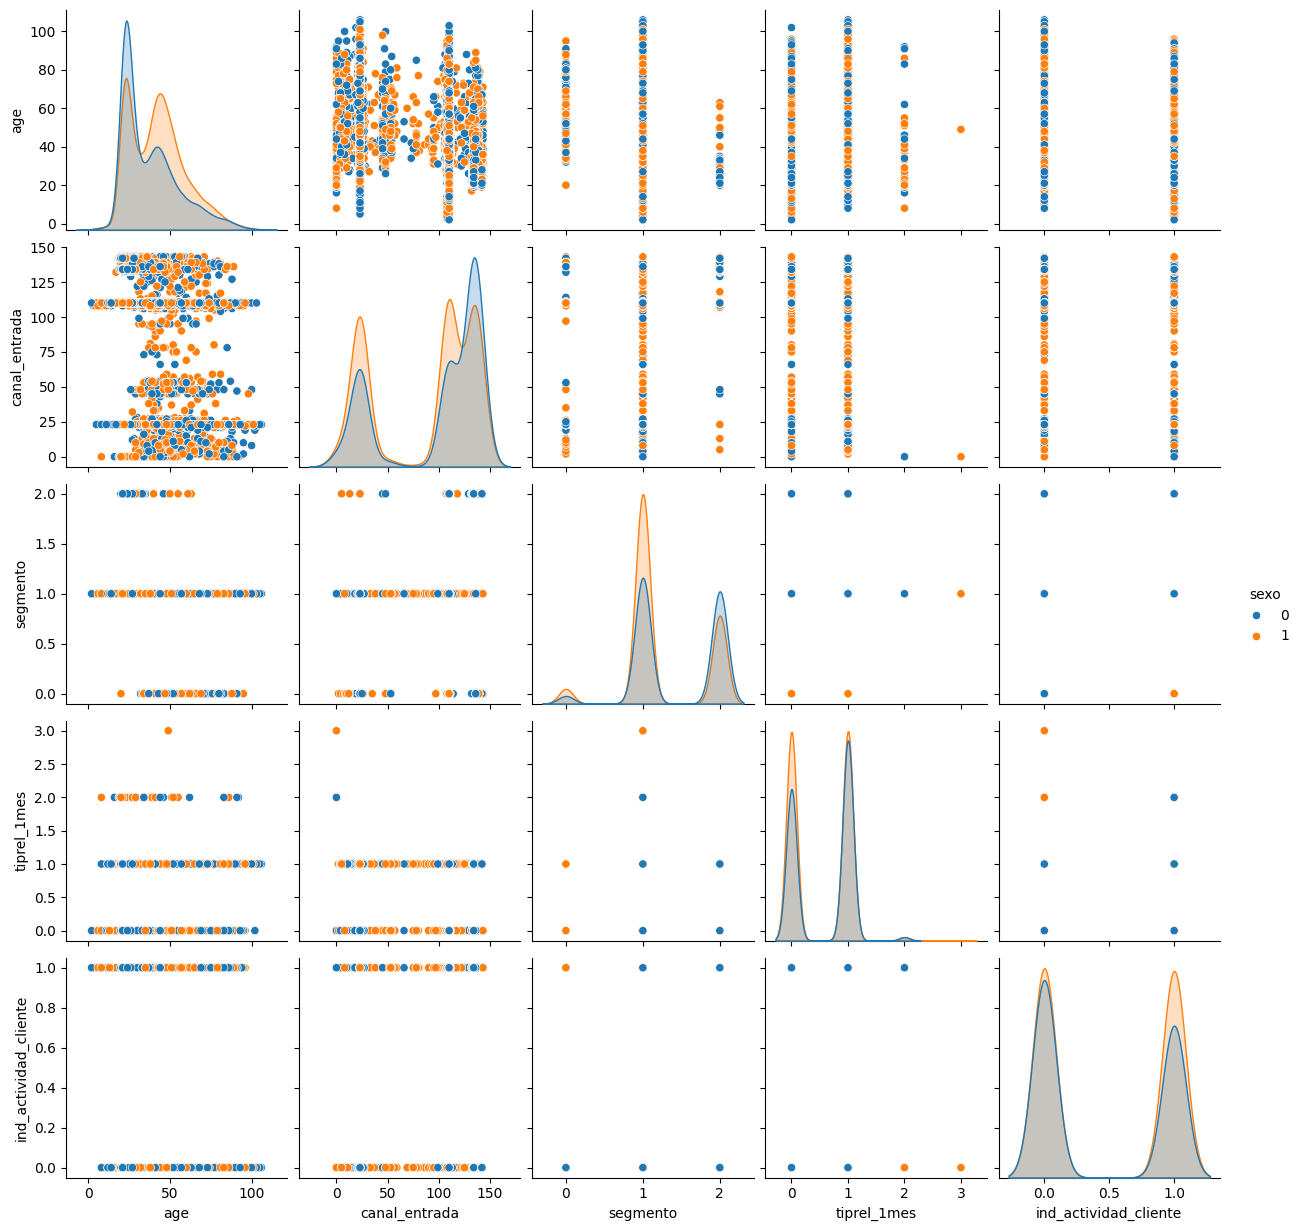

In [334]:
sns.pairplot(events_features_clean[['sexo','age','canal_entrada','segmento','tiprel_1mes','ind_actividad_cliente']].sample(10000),hue='sexo')
plt.savefig("/home/mle-user/mle_projects/mle-pr-final/artifacts/figure_pairplot.png")

Выводы - в целом не вижу явных коррелиций, при которых надо удалить часть признаков

 - возраст - есть 2 пика, у мужчин и женщин есть различия
 - возраст и канал - на графике распределен равномерно
 - возраст и сегмент 2 университет - более молодые
 - возраст и тип клиента связаны
 - канал взаимодействия - предпочтения по каналам отличаются у мужчин и у женщин

## 2.6 - смотрю targets

In [335]:
#правлю форматы
events[target_col].select_dtypes('object')

,ind_nomina_ult1,ind_nom_pens_ult1
7,0,0
31,0,0
36,0,0
47,0,0
57,0,0
...,...,...
13647262,0,0
13647279,0,0
13647297,0,0
13647299,0,0


In [336]:
# Указание типов данных для столбцов
dtype_dict = {'ind_nomina_ult1': 'int','ind_nom_pens_ult1': 'int',}

In [337]:
events[target_col]=events[target_col].astype(dtype_dict)

In [338]:
events[target_col].mean()

ind_ahor_fin_ult1    0.000100
ind_aval_fin_ult1    0.000026
ind_cco_fin_ult1     0.656229
ind_cder_fin_ult1    0.000355
ind_cno_fin_ult1     0.080226
ind_ctju_fin_ult1    0.010099
ind_ctma_fin_ult1    0.010067
ind_ctop_fin_ult1    0.129586
ind_ctpp_fin_ult1    0.044194
ind_deco_fin_ult1    0.001817
ind_deme_fin_ult1    0.001608
ind_dela_fin_ult1    0.043107
ind_ecue_fin_ult1    0.082654
ind_fond_fin_ult1    0.018649
ind_hip_fin_ult1     0.006125
ind_plan_fin_ult1    0.008957
ind_pres_fin_ult1    0.002546
ind_reca_fin_ult1    0.051285
ind_tjcr_fin_ult1    0.042715
ind_valo_fin_ult1    0.026406
ind_viv_fin_ult1     0.004003
ind_nomina_ult1      0.054267
ind_nom_pens_ult1    0.059094
ind_recibo_ult1      0.127826
dtype: float64

Выводы
1. Есть популярные продукты (топ 5)
 - ind_cco_fin_ult1 (Текущие счета) есть у 0.65 записей 
 - ind_ctop_fin_ult1 (Особый счёт) есть у 0.13 записей
 - ind_cno_fin_ult1 есть у 0.08 записей
 - ind_ecue_fin_ult1 (Цифровой счёт) есть у 0.08 записей
 - ind_recibo_ult1 есть (Дебетовый аккаунт) у 0.13 записей

 2. Есть очень редкие (возможно нишевые) продукты, например:
 - ind_ahor_fin_ult1 Сберегательный счёт
 - ind_aval_fin_ult1 Банковская гарантия

 3. Есть ряд продуктов, которые по названию очевидно рассчитаны на определенную возрастную категорию
 - Аккаунт для пенсионных обязательств, Пенсионный план, Детский счёт

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Выводы корректные!
</div>

## 2.7 - смотрю корреляцию признаков и целевых переменных

In [339]:
features_col_=events_features_clean.select_dtypes(['int','float']).columns.to_list()
columns_corr=features_col_+target_col.to_list()

In [340]:
corr_results=events[columns_corr].corr()[target_col]

In [341]:
corr_results[:11].sort_values(by='ind_ahor_fin_ult1',ascending=False)

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
antiguedad,0.014203,0.006064,-0.168347,0.014945,0.131323,0.016953,-0.046244,0.472348,0.158485,-0.018023,...,0.107445,0.128264,0.037381,0.193744,0.186007,0.185887,0.085051,0.121195,0.131836,0.143732
ind_actividad_cliente,0.010310,0.005530,0.173755,0.017290,0.312874,0.075616,0.065353,0.171502,0.161285,0.037613,...,0.084747,0.102024,0.036014,0.220420,0.226689,0.176191,0.040030,0.258459,0.270172,0.410530
renta,0.007535,0.000591,-0.025641,0.002504,0.015953,0.011692,0.002284,0.046256,0.026130,0.000120,...,0.003960,0.020364,-0.009240,0.036263,0.025879,0.028254,0.009559,0.012725,0.015547,0.018966
sexo,0.004383,0.004663,-0.038454,0.014010,0.033769,-0.004659,0.014963,0.061271,0.028060,0.004357,...,0.027348,0.020266,0.016356,0.055775,0.048280,0.059271,0.008995,0.026125,0.028135,0.049108
age,0.003358,-0.000009,-0.167994,0.013264,0.069942,-0.158060,0.037225,0.322195,0.122636,0.020860,...,0.040676,0.065885,0.025215,0.098859,0.099038,0.109216,0.018746,0.042902,0.072202,0.087930
indext,-0.002249,-0.001144,-0.024858,-0.004227,-0.009568,-0.018723,-0.002580,-0.033422,-0.010083,-0.003863,...,-0.009740,-0.005496,0.030603,0.002390,-0.002820,-0.020356,-0.000069,-0.008390,-0.011470,-0.003413
ind_nuevo,-0.002523,-0.001284,0.005103,-0.004743,-0.046879,-0.011340,0.041789,-0.097144,-0.054142,0.084539,...,-0.019766,-0.023087,-0.012721,-0.055449,-0.050899,-0.039025,-0.015963,-0.036027,-0.038458,-0.054072
cod_prov,-0.005287,0.000556,-0.001126,0.002406,0.005979,0.007817,0.008129,0.046102,0.008686,0.000748,...,-0.002581,0.004764,-0.009985,0.005819,0.006030,0.013823,0.003659,0.001821,0.003235,0.008103
tiprel_1mes,-0.008968,-0.005457,-0.094953,-0.020093,-0.308349,-0.072379,-0.052691,-0.161693,-0.147621,-0.039490,...,-0.083991,-0.101660,-0.053467,-0.194556,-0.224976,-0.176084,-0.040416,-0.252231,-0.263828,-0.397644
canal_entrada,-0.009705,-0.002219,0.191800,-0.004665,-0.121734,-0.023249,-0.008625,-0.268001,-0.141924,0.008838,...,-0.087767,-0.080417,-0.065022,-0.141110,-0.141090,-0.117892,-0.049334,-0.106288,-0.117003,-0.142719


antiguedad - слабая корреляция для всех таргетов (стаж клиента в месяцах)
остальные признаки оставляем - так как продуктов много

In [ ]:
Набор тарелок 

## 2.8 - числовые признаки (возраст и доход)

смотрю выбросы

In [342]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1423859 entries, 7 to 13647302
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   fecha_dato             1423859 non-null  datetime64[ns]
 1   ncodpers               1423859 non-null  int64         
 2   ind_empleado           1423859 non-null  int64         
 3   pais_residencia        1423859 non-null  category      
 4   sexo                   1423859 non-null  int64         
 5   age                    1423859 non-null  int64         
 6   fecha_alta             1423859 non-null  datetime64[ns]
 7   ind_nuevo              1423859 non-null  int64         
 8   antiguedad             1423859 non-null  int64         
 9   indrel                 1423859 non-null  int64         
 10  ult_fec_cli_1t         1423859 non-null  int64         
 11  indrel_1mes            1423859 non-null  int64         
 12  tiprel_1mes            1423859 n

In [343]:
#сохраню промежуточный результат

In [344]:
events.to_parquet('/home/mle-user/mle_projects/mle-pr-final/data/events.parquet')

In [345]:
events = pd.read_parquet('/home/mle-user/mle_projects/mle-pr-final/data/events.parquet')

<Axes: ylabel='Frequency'>

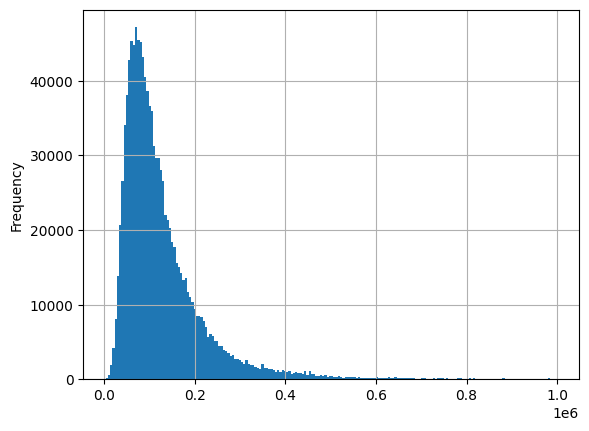

In [346]:
events.query('renta<1000000')['renta'].plot(kind='hist',bins=200,grid=True)

Разделю вручную доход на несколько примерно равных по численности категорий
 - 0 - нет данных - 3 млн записей
 - 1 - до 100000 - 5 млн записей
 - 2 - от 100000 до 400000 - 5 млн
 - 3 - от 400000 - 275 тысяч

сделаю через промежуточный атрибут rent_group, чтобы можно было проверить результат

In [347]:
def rent_cat(rent):
    if rent<100000: return 1
    elif rent<400000:return 2
    elif rent>=400000: return 3
    else: return 0

events['renta_group']=events['renta'].apply(rent_cat)

In [348]:
events.query('renta_group==3')[['renta','renta_group']]

,renta,renta_group
822,878790.72,3
1444,745357.38,3
2082,581086.77,3
3993,413724.30,3
4011,458401.92,3
...,...,...
13645727,516626.97,3
13645941,421976.10,3
13646362,2425069.44,3
13646829,447506.85,3


<Axes: xlabel='renta_group', ylabel='ncodpers'>

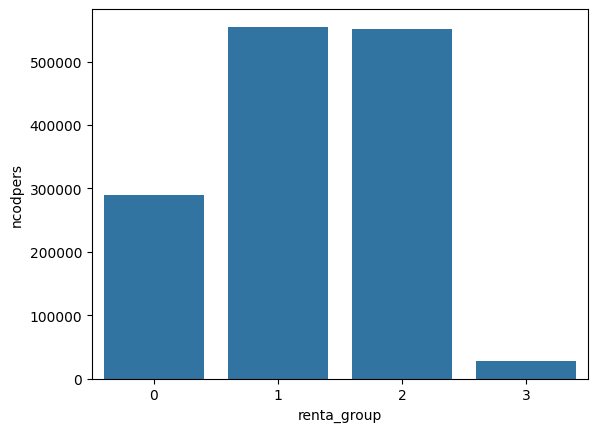

In [349]:
x = "renta_group"
y = "ncodpers"

agg_df = pd.DataFrame(events.groupby(by=x).agg({y: "count"}).reset_index())
sns.barplot(data=agg_df, x=x, y=y)

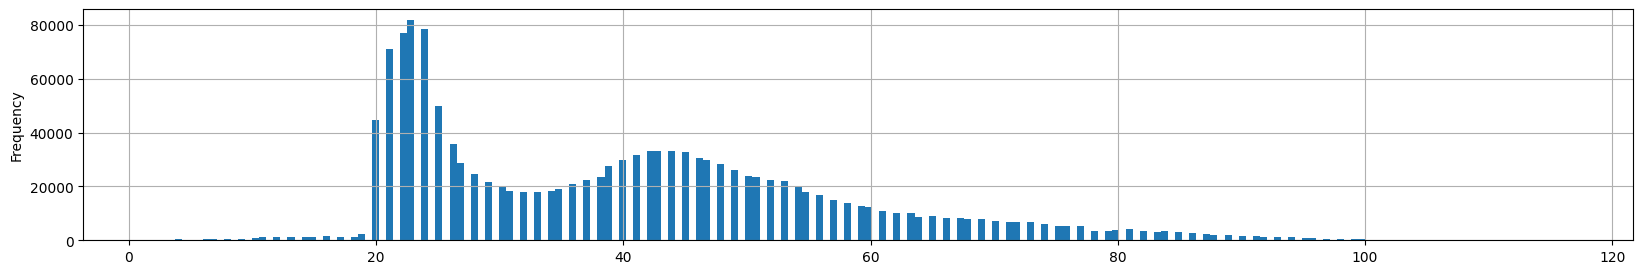

In [350]:
plt.figure(figsize=(20, 3))
events['age'].plot(kind='hist',bins=200,grid=True)
plt.savefig("/home/mle-user/mle_projects/mle-pr-final/artifacts/figure_age.png")

In [351]:
#сохраняю промежуточный результат

events.to_parquet('/home/mle-user/mle_projects/mle-pr-final/data/events.parquet')

## 2.10 - кодирую числовой признаки возраст

In [352]:
events_ = pd.read_parquet('/home/mle-user/mle_projects/mle-pr-final/data/events.parquet')

In [353]:
events_.columns[-25:-1]

Index(['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [354]:
target_cols=events_.columns[-25:-1]
#target_cols=events_.columns.to_list()[12:]

In [355]:
num_col_age=events_[['age']].columns.tolist()

preprocessor = ColumnTransformer(
[('num_age',KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'),num_col_age),
 ],verbose_feature_names_out=False,remainder='passthrough')

data_transformed = preprocessor.fit_transform(events_,events_[target_cols])

In [356]:
data_transformed=pd.DataFrame(data_transformed, columns=preprocessor.get_feature_names_out())

Укрупним признаки canal_entrada и cod_prov

In [357]:
canal_top=data_transformed.groupby('canal_entrada').agg({'age':'count'}).reset_index().sort_values(by='age',ascending=False).head(10)['canal_entrada'].values

In [358]:
canal_top

array([134,  23, 110, 142, 108, 136, 138,   0, 133, 139])

In [359]:
data_transformed[~data_transformed['canal_entrada'].isin(canal_top)]

,age,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,renta_group
324,3.0,2015-01-28,1056792,3,ES,1,2013-03-20,0,28,0,...,0,0,0,0,0,0,0,0,0,1
376,2.0,2015-01-28,1053212,3,ES,1,2012-08-21,0,34,0,...,0,0,1,1,0,0,0,0,1,2
471,3.0,2015-01-28,1055093,3,ES,1,2012-08-30,0,35,0,...,0,0,0,0,0,0,0,0,0,1
716,1.0,2015-01-28,1043390,3,ES,0,2012-08-06,0,35,0,...,0,0,0,0,0,0,0,0,0,1
885,3.0,2015-01-28,1045804,3,ES,1,2012-08-07,0,35,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420671,2.0,2016-05-28,1126835,3,ES,0,2013-04-04,0,37,0,...,0,0,0,0,0,0,0,0,1,1
1420897,2.0,2016-05-28,1178246,3,ES,0,2013-09-18,0,32,0,...,0,0,0,0,0,0,0,0,0,1
1421940,1.0,2016-05-28,1184054,3,ES,1,2013-09-26,1,3,0,...,0,0,0,0,0,0,0,0,0,0
1423369,2.0,2016-05-28,1172121,3,ES,1,2013-09-03,0,28,0,...,0,0,0,0,0,0,0,0,0,1


In [360]:
data_transformed.loc[~data_transformed['canal_entrada'].isin(canal_top),'canal_entrada']=9999

In [361]:
data_transformed.groupby('canal_entrada').agg({'age':'count'}).reset_index()

,canal_entrada,age
0,0,16326
1,23,341808
2,108,42395
3,110,321198
4,133,12483
5,134,425831
6,136,25523
7,138,19073
8,139,12169
9,142,62164


In [362]:
cod_top=data_transformed.groupby('cod_prov').agg({'age':'count'}).reset_index().sort_values(by='age',ascending=False).head(20)['cod_prov'].values

In [363]:
data_transformed.loc[~data_transformed['cod_prov'].isin(cod_top),'cod_prov']=9999

In [364]:
data_transformed.groupby('cod_prov').agg({'age':'count'}).reset_index()

,cod_prov,age
0,2,32817
1,5,20054
2,7,135351
3,10,30540
4,13,15826
5,14,45489
6,17,18753
7,27,459264
8,28,37389
9,29,39932


In [365]:
data_transformed.sample(3).T

,448000,720962,288823
age,1.0,4.0,1.0
fecha_dato,2015-07-28 00:00:00,2015-10-28 00:00:00,2015-05-28 00:00:00
ncodpers,1155782,45898,1162210
ind_empleado,3,3,3
pais_residencia,ES,ES,ES
sexo,0,1,1
fecha_alta,2013-08-03 00:00:00,1996-09-23 00:00:00,2013-08-10 00:00:00
ind_nuevo,0,0,0
antiguedad,23,229,23
indrel,0,0,0


In [366]:
data_transformed.to_parquet('/home/mle-user/mle_projects/mle-pr-final/data/data_transformed.parquet')

In [367]:
data_transformed.sample(10).to_csv('/home/mle-user/mle_projects/mle-pr-final/data/data_transformed_sample.csv')

In [368]:
if mlflow.active_run():
    print(f"Active run exists: {mlflow.active_run().info.run_id}")
    mlflow.end_run()  # Завершить текущий run

In [369]:
RUN_NAME = "EDA"

In [370]:
with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.log_artifact('/home/mle-user/mle_projects/mle-pr-final/data/df_sample.csv',"data")
    mlflow.log_artifact("/home/mle-user/mle_projects/mle-pr-final/artifacts/figure_features.png","graphics")
    mlflow.log_artifact("/home/mle-user/mle_projects/mle-pr-final/artifacts/figure_heatmap.png","graphics")
    mlflow.log_artifact("/home/mle-user/mle_projects/mle-pr-final/artifacts/figure_pairplot.png","graphics")
    mlflow.log_artifact('/home/mle-user/mle_projects/mle-pr-final/data/data_transformed_sample.csv',"data")

Вывод
 - часть признаков надо укрупнить для использования в моделях

в итоге получил красивые подготовленные признаки для использования в моделях

# 3 - Разделение данных и модель

In [371]:
data = pd.read_parquet('/home/mle-user/mle_projects/mle-pr-final/data/data_transformed.parquet')

In [372]:
data=data.drop(columns=['ind_empleado','indrel','ult_fec_cli_1t','indresi','indfall','nomprov','indrel_1mes','conyuemp','tipodom','antiguedad'])

In [373]:
data.head(3)

,age,fecha_dato,ncodpers,pais_residencia,sexo,fecha_alta,ind_nuevo,tiprel_1mes,indext,canal_entrada,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,renta_group
0,1.0,2015-01-28,1050617,ES,0,2012-08-10,0,0,0,134,...,0,0,0,0,0,0,0,0,0,2
1,2.0,2015-01-28,1050601,ES,1,2012-08-10,0,1,0,134,...,0,0,0,0,0,0,0,0,0,2
2,1.0,2015-01-28,1050580,ES,0,2012-08-10,0,0,0,134,...,0,0,0,0,0,0,0,0,0,1


In [374]:
data.columns.to_list()

['age',
 'fecha_dato',
 'ncodpers',
 'pais_residencia',
 'sexo',
 'fecha_alta',
 'ind_nuevo',
 'tiprel_1mes',
 'indext',
 'canal_entrada',
 'cod_prov',
 'ind_actividad_cliente',
 'renta',
 'segmento',
 'ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1',
 'renta_group']

<Axes: xlabel='age', ylabel='ncodpers'>

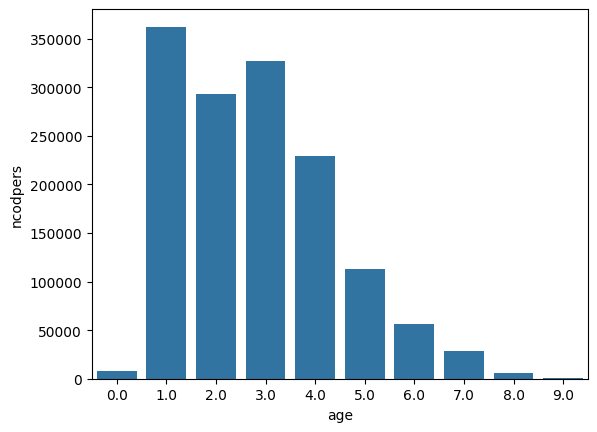

In [375]:
x = "age"
y = "ncodpers"

agg_df = pd.DataFrame(data.groupby(by=x).agg({y: "count"}).reset_index())
sns.barplot(data=agg_df, x=x, y=y)

In [376]:
train_test_global_time_split_date = pd.to_datetime('2016-04-28')

In [377]:
train_test_global_time_split_idx = data["fecha_dato"] < train_test_global_time_split_date
events_train = data[train_test_global_time_split_idx]
events_test=data[~train_test_global_time_split_idx]

In [378]:
data.columns.to_list()

['age',
 'fecha_dato',
 'ncodpers',
 'pais_residencia',
 'sexo',
 'fecha_alta',
 'ind_nuevo',
 'tiprel_1mes',
 'indext',
 'canal_entrada',
 'cod_prov',
 'ind_actividad_cliente',
 'renta',
 'segmento',
 'ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1',
 'renta_group']

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Выборки сформированы, отлично!
</div>

# Деревья решений

Самая первая идея - прогнать циклом модели деревья решений для различных таргетов
 - Чтобы расчеты не занимали много времени - сделаю на сэмпле данных
 - Основная цель - подробнее ознакомиться с продуктами, посмотреть на интерпретацию результатов, померить качество

1. Есть популярные продукты (топ 5)
 - ind_cco_fin_ult1 (Текущие счета) есть у 0.65 записей 
 - ind_ctop_fin_ult1 (Особый счёт) есть у 0.13 записей
 - ind_cno_fin_ult1 есть у 0.08 записей
 - ind_ecue_fin_ult1 (Цифровой счёт) есть у 0.08 записей
 - ind_recibo_ult1 есть (Дебетовый аккаунт) у 0.13 записей

## sample клиентов (для ускорения расчетов)

In [379]:
data['ncodpers'].nunique()

99277

In [380]:
persons=data['ncodpers'].drop_duplicates()
persons_test=persons.sample(50000,random_state=0)

In [381]:
events_train_cb=events_train[events_train['ncodpers'].isin(persons_test)]
events_test_cb=events_test[events_test['ncodpers'].isin(persons_test)]

In [382]:
events_train_cb[target_col[6]].sum()

6396

In [383]:
events_train_cb

,age,fecha_dato,ncodpers,pais_residencia,sexo,fecha_alta,ind_nuevo,tiprel_1mes,indext,canal_entrada,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,renta_group
1,2.0,2015-01-28,1050601,ES,1,2012-08-10,0,1,0,134,...,0,0,0,0,0,0,0,0,0,2
3,2.0,2015-01-28,1050694,ES,1,2012-08-10,0,0,0,110,...,0,0,0,0,0,0,0,0,1,1
4,2.0,2015-01-28,1050660,ES,0,2012-08-10,0,0,0,110,...,0,0,0,0,0,0,0,0,1,1
5,1.0,2015-01-28,1050633,ES,1,2012-08-10,0,0,0,134,...,0,0,0,0,0,0,0,0,0,1
6,1.0,2015-01-28,1050635,ES,1,2012-08-10,0,0,0,134,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229469,1.0,2016-03-28,1052276,ES,1,2012-08-16,0,1,0,134,...,0,0,0,0,0,0,0,0,0,2
1229470,2.0,2016-03-28,1052349,ES,0,2012-08-17,0,0,0,134,...,0,0,0,0,0,0,0,0,0,0
1229472,1.0,2016-03-28,1052314,ES,1,2012-08-16,0,1,0,134,...,0,0,0,0,0,0,0,0,0,1
1229473,1.0,2016-03-28,1052384,ES,0,2012-08-17,0,0,0,133,...,0,0,0,0,0,0,0,0,0,1


In [384]:
 # количество пользователей в train и test
users_train_cb = events_train_cb['ncodpers'].drop_duplicates()
users_test_cb = events_test_cb['ncodpers'].drop_duplicates()
    # количество пользователей, которые есть и в train, и в test
common_users_cb = set(users_test_cb).intersection(set(users_train_cb))
    
print(len(users_train_cb), len(users_test_cb), len(common_users_cb))

49552 49152 48704


## расчет моделей cb

In [385]:
target_col=data.columns.to_list()[-25:-1]
target_col

['ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

In [386]:
for i in range(len(target_col)):#range(3):
    RUN_NAME=f"TREES_{i}"
    with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
        run_id = run.info.run_id

        features=['age','sexo','ind_nuevo','tiprel_1mes','indext','canal_entrada','cod_prov','ind_actividad_cliente','segmento','renta_group']
        target = target_col[i]

# создаём Pool
        train_data = Pool(data=events_train_cb[features],label=events_train_cb[target])

# инициализируем модель CatBoostClassifier
        cb_model = CatBoostClassifier(iterations=200,learning_rate=0.1,depth=4,loss_function='Logloss',verbose=100,random_seed=0,)
        cb_model.fit(train_data)

    # предсказания
        inference_data_Y = Pool(data=events_test_cb[features])
        predictions = cb_model.predict_proba(inference_data_Y)
        events_test_cb[f'score_0{i}'] = predictions[:, 1]

        pickle.dump(cb_model, open(f'/home/mle-user/mle_projects/mle-pr-final/models/1_cbmodel_{i}{target_col[i]}.pickle','wb'))

        signature = mlflow.models.infer_signature(events_train_cb[features], events_train_cb[target])
        REGISTRY_MODEL_NAME=f'CBMODEL_0{i}{target_col[i]}'

        model_info = mlflow.catboost.log_model(
            cb_model=cb_model,
            artifact_path="models_",
            registered_model_name=REGISTRY_MODEL_NAME,
            signature=signature,
            await_registration_for=60)
        
        if mlflow.active_run(): mlflow.end_run()


0:	learn: 0.3289217	total: 91.8ms	remaining: 18.3s
100:	learn: 0.0001502	total: 5.37s	remaining: 5.26s
199:	learn: 0.0001273	total: 10.7s	remaining: 0us


Registered model 'CBMODEL_00ind_ahor_fin_ult1' already exists. Creating a new version of this model...
2025/03/03 11:37:58 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_00ind_ahor_fin_ult1, version 4
Created version '4' of model 'CBMODEL_00ind_ahor_fin_ult1'.


0:	learn: 0.3160121	total: 50.1ms	remaining: 9.97s
100:	learn: 0.0001898	total: 5.31s	remaining: 5.2s
199:	learn: 0.0001858	total: 10.8s	remaining: 0us


Registered model 'CBMODEL_01ind_aval_fin_ult1' already exists. Creating a new version of this model...
2025/03/03 11:38:10 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_01ind_aval_fin_ult1, version 4
Created version '4' of model 'CBMODEL_01ind_aval_fin_ult1'.


0:	learn: 0.6626283	total: 46.3ms	remaining: 9.21s
100:	learn: 0.5205859	total: 5s	remaining: 4.9s
199:	learn: 0.5162024	total: 11.1s	remaining: 0us


Registered model 'CBMODEL_02ind_cco_fin_ult1' already exists. Creating a new version of this model...
2025/03/03 11:38:23 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_02ind_cco_fin_ult1, version 3
Created version '3' of model 'CBMODEL_02ind_cco_fin_ult1'.


0:	learn: 0.3742598	total: 54.1ms	remaining: 10.8s
100:	learn: 0.0020076	total: 5.55s	remaining: 5.44s
199:	learn: 0.0016168	total: 10.6s	remaining: 0us


Successfully registered model 'CBMODEL_03ind_cder_fin_ult1'.
2025/03/03 11:38:35 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_03ind_cder_fin_ult1, version 1
Created version '1' of model 'CBMODEL_03ind_cder_fin_ult1'.


0:	learn: 0.5088369	total: 71.6ms	remaining: 14.3s
100:	learn: 0.1944126	total: 6.04s	remaining: 5.93s
199:	learn: 0.1923272	total: 11.4s	remaining: 0us


Successfully registered model 'CBMODEL_04ind_cno_fin_ult1'.
2025/03/03 11:38:48 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_04ind_cno_fin_ult1, version 1
Created version '1' of model 'CBMODEL_04ind_cno_fin_ult1'.


0:	learn: 0.4544575	total: 69.9ms	remaining: 13.9s
100:	learn: 0.0074851	total: 6.92s	remaining: 6.79s
199:	learn: 0.0068496	total: 12.4s	remaining: 0us


Successfully registered model 'CBMODEL_05ind_ctju_fin_ult1'.
2025/03/03 11:39:03 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_05ind_ctju_fin_ult1, version 1
Created version '1' of model 'CBMODEL_05ind_ctju_fin_ult1'.


0:	learn: 0.4933690	total: 47.7ms	remaining: 9.49s
100:	learn: 0.0486755	total: 5.23s	remaining: 5.12s
199:	learn: 0.0470790	total: 11.3s	remaining: 0us


Successfully registered model 'CBMODEL_06ind_ctma_fin_ult1'.
2025/03/03 11:39:16 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_06ind_ctma_fin_ult1, version 1
Created version '1' of model 'CBMODEL_06ind_ctma_fin_ult1'.


0:	learn: 0.5748277	total: 53.6ms	remaining: 10.7s
100:	learn: 0.2938043	total: 5.47s	remaining: 5.36s
199:	learn: 0.2905646	total: 12.2s	remaining: 0us


Successfully registered model 'CBMODEL_07ind_ctop_fin_ult1'.
2025/03/03 11:39:30 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_07ind_ctop_fin_ult1, version 1
Created version '1' of model 'CBMODEL_07ind_ctop_fin_ult1'.


0:	learn: 0.5287860	total: 50.3ms	remaining: 10s
100:	learn: 0.1433151	total: 5.45s	remaining: 5.34s
199:	learn: 0.1410837	total: 10.5s	remaining: 0us


Successfully registered model 'CBMODEL_08ind_ctpp_fin_ult1'.
2025/03/03 11:39:42 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_08ind_ctpp_fin_ult1, version 1
Created version '1' of model 'CBMODEL_08ind_ctpp_fin_ult1'.


0:	learn: 0.4150316	total: 68.9ms	remaining: 13.7s
100:	learn: 0.0094166	total: 6.38s	remaining: 6.26s
199:	learn: 0.0090437	total: 11.6s	remaining: 0us


Successfully registered model 'CBMODEL_09ind_deco_fin_ult1'.
2025/03/03 11:39:55 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_09ind_deco_fin_ult1, version 1
Created version '1' of model 'CBMODEL_09ind_deco_fin_ult1'.


0:	learn: 0.4197288	total: 51.1ms	remaining: 10.2s
100:	learn: 0.0087264	total: 6.6s	remaining: 6.47s
199:	learn: 0.0079811	total: 11.7s	remaining: 0us


Successfully registered model 'CBMODEL_010ind_deme_fin_ult1'.
2025/03/03 11:40:09 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_010ind_deme_fin_ult1, version 1
Created version '1' of model 'CBMODEL_010ind_deme_fin_ult1'.


0:	learn: 0.4682024	total: 51.7ms	remaining: 10.3s
100:	learn: 0.1087316	total: 5.12s	remaining: 5.02s
199:	learn: 0.1071642	total: 11.5s	remaining: 0us


Successfully registered model 'CBMODEL_011ind_dela_fin_ult1'.
2025/03/03 11:40:22 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_011ind_dela_fin_ult1, version 1
Created version '1' of model 'CBMODEL_011ind_dela_fin_ult1'.


0:	learn: 0.5278002	total: 54.6ms	remaining: 10.9s
100:	learn: 0.2051882	total: 5.9s	remaining: 5.78s
199:	learn: 0.2029212	total: 12.2s	remaining: 0us


Successfully registered model 'CBMODEL_012ind_ecue_fin_ult1'.
2025/03/03 11:40:36 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_012ind_ecue_fin_ult1, version 1
Created version '1' of model 'CBMODEL_012ind_ecue_fin_ult1'.


0:	learn: 0.5085503	total: 49.6ms	remaining: 9.88s
100:	learn: 0.0664893	total: 5.19s	remaining: 5.09s
199:	learn: 0.0649251	total: 10.4s	remaining: 0us


Successfully registered model 'CBMODEL_013ind_fond_fin_ult1'.
2025/03/03 11:40:49 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_013ind_fond_fin_ult1, version 1
Created version '1' of model 'CBMODEL_013ind_fond_fin_ult1'.


0:	learn: 0.4668279	total: 68ms	remaining: 13.5s
100:	learn: 0.0246268	total: 6.41s	remaining: 6.28s
199:	learn: 0.0235038	total: 12.2s	remaining: 0us


Successfully registered model 'CBMODEL_014ind_hip_fin_ult1'.
2025/03/03 11:41:03 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_014ind_hip_fin_ult1, version 1
Created version '1' of model 'CBMODEL_014ind_hip_fin_ult1'.


0:	learn: 0.4889947	total: 50.1ms	remaining: 9.97s
100:	learn: 0.0368004	total: 6.45s	remaining: 6.32s
199:	learn: 0.0353939	total: 11.4s	remaining: 0us


Successfully registered model 'CBMODEL_015ind_plan_fin_ult1'.
2025/03/03 11:41:16 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_015ind_plan_fin_ult1, version 1
Created version '1' of model 'CBMODEL_015ind_plan_fin_ult1'.


0:	learn: 0.4179067	total: 49ms	remaining: 9.76s
100:	learn: 0.0092195	total: 5.46s	remaining: 5.36s
199:	learn: 0.0081617	total: 12s	remaining: 0us


Successfully registered model 'CBMODEL_016ind_pres_fin_ult1'.
2025/03/03 11:41:30 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_016ind_pres_fin_ult1, version 1
Created version '1' of model 'CBMODEL_016ind_pres_fin_ult1'.


0:	learn: 0.5266674	total: 53.2ms	remaining: 10.6s
100:	learn: 0.1524591	total: 5.34s	remaining: 5.23s
199:	learn: 0.1502125	total: 11.5s	remaining: 0us


Successfully registered model 'CBMODEL_017ind_reca_fin_ult1'.
2025/03/03 11:41:43 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_017ind_reca_fin_ult1, version 1
Created version '1' of model 'CBMODEL_017ind_reca_fin_ult1'.


0:	learn: 0.4605582	total: 54.1ms	remaining: 10.8s
100:	learn: 0.1214733	total: 5.38s	remaining: 5.28s
199:	learn: 0.1200634	total: 10.4s	remaining: 0us


Successfully registered model 'CBMODEL_018ind_tjcr_fin_ult1'.
2025/03/03 11:41:55 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_018ind_tjcr_fin_ult1, version 1
Created version '1' of model 'CBMODEL_018ind_tjcr_fin_ult1'.


0:	learn: 0.5275508	total: 70.4ms	remaining: 14s
100:	learn: 0.0858004	total: 6.67s	remaining: 6.54s
199:	learn: 0.0840836	total: 11.7s	remaining: 0us


Successfully registered model 'CBMODEL_019ind_valo_fin_ult1'.
2025/03/03 11:42:09 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_019ind_valo_fin_ult1, version 1
Created version '1' of model 'CBMODEL_019ind_valo_fin_ult1'.


0:	learn: 0.4556447	total: 57.9ms	remaining: 11.5s
100:	learn: 0.0217533	total: 6.1s	remaining: 5.98s
199:	learn: 0.0204901	total: 11.6s	remaining: 0us


Successfully registered model 'CBMODEL_020ind_viv_fin_ult1'.
2025/03/03 11:42:22 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_020ind_viv_fin_ult1, version 1
Created version '1' of model 'CBMODEL_020ind_viv_fin_ult1'.


0:	learn: 0.4715432	total: 51.3ms	remaining: 10.2s
100:	learn: 0.1463295	total: 5.68s	remaining: 5.57s
199:	learn: 0.1445005	total: 12s	remaining: 0us


Successfully registered model 'CBMODEL_021ind_nomina_ult1'.
2025/03/03 11:42:36 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_021ind_nomina_ult1, version 1
Created version '1' of model 'CBMODEL_021ind_nomina_ult1'.


0:	learn: 0.5021786	total: 49.9ms	remaining: 9.93s
100:	learn: 0.1587336	total: 5.32s	remaining: 5.21s
199:	learn: 0.1568705	total: 10.8s	remaining: 0us


Successfully registered model 'CBMODEL_022ind_nom_pens_ult1'.
2025/03/03 11:42:49 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_022ind_nom_pens_ult1, version 1
Created version '1' of model 'CBMODEL_022ind_nom_pens_ult1'.


0:	learn: 0.5211105	total: 51.7ms	remaining: 10.3s
100:	learn: 0.2442557	total: 5.39s	remaining: 5.28s
199:	learn: 0.2418397	total: 10.9s	remaining: 0us


Successfully registered model 'CBMODEL_023ind_recibo_ult1'.
2025/03/03 11:43:01 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: CBMODEL_023ind_recibo_ult1, version 1
Created version '1' of model 'CBMODEL_023ind_recibo_ult1'.


In [387]:
#сохраняю
events_test_cb.to_parquet('/home/mle-user/mle_projects/mle-pr-final/data/events_test_cb.parquet')

In [388]:
events_test_cb = pd.read_parquet('/home/mle-user/mle_projects/mle-pr-final/data/events_test_cb.parquet')

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Первая модель обучена, отлично!
</div>

<div class="alert alert-warning">
    
⚠️ Возможно стоило использовать больше деревьев для постоения градиентного бустинга.

</div>

## Смотрю на результаты и возможные пороги

In [389]:
for i in range(len(target_col)):
    a=events_test_cb.groupby(target_col[i]).agg({f'score_0{i}':'mean'}).reset_index()
    print(a)

   ind_ahor_fin_ult1  score_00
0                  0  0.000029
1                  1  0.467231
   ind_aval_fin_ult1  score_01
0                  0  0.000024
1                  1  0.004333
   ind_cco_fin_ult1  score_02
0                 0  0.514266
1                 1  0.742684
   ind_cder_fin_ult1  score_03
0                  0  0.000301
1                  1  0.177517
   ind_cno_fin_ult1  score_04
0                 0  0.058704
1                 1  0.240899
   ind_ctju_fin_ult1  score_05
0                  0  0.002295
1                  1  0.773792
   ind_ctma_fin_ult1  score_06
0                  0  0.009870
1                  1  0.067785
   ind_ctop_fin_ult1  score_07
0                  0  0.102598
1                  1  0.285047
   ind_ctpp_fin_ult1  score_08
0                  0  0.035924
1                  1  0.125858
   ind_deco_fin_ult1  score_09
0                  0  0.001656
1                  1  0.016233
   ind_deme_fin_ult1  score_010
0                  0   0.001345
1           

TARGET
 - ind_ahor_fin_ult1	Сберегательный счёт
 - ind_aval_fin_ult1	Банковская гарантия
 - ind_cco_fin_ult1	Текущие счета
 - ind_cder_fin_ult1	Деривативный счёт
 - ind_cno_fin_ult1	Зарплатный проект
 - ind_ctju_fin_ult1	Детский счёт
 - ind_ctma_fin_ult1	Особый счёт 3
 - ind_ctop_fin_ult1	Особый счёт
 - ind_ctpp_fin_ult1	Особый счёт 2
 - ind_deco_fin_ult1	Краткосрочный депозит
 - ind_deme_fin_ult1	Среднесрочный депозит
 - ind_dela_fin_ult1	Долгосрочный депозит
 - ind_ecue_fin_ult1	Цифровой счёт
 - ind_fond_fin_ult1	Денежный средства
 - ind_hip_fin_ult1	Ипотека
 - ind_plan_fin_ult1	Пенсионный план
 - ind_pres_fin_ult1	Кредит
 - ind_reca_fin_ult1	Налоговый счёт
 - ind_tjcr_fin_ult1	Кредитная карта
 - ind_valo_fin_ult1	Ценные бумаги
 - ind_viv_fin_ult1	Домашний счёт
 - ind_nomina_ult1	Аккаунт для выплаты зарплаты
 - ind_nom_pens_ult1	Аккаунт для пенсионных обязательств
 - ind_recibo_ult1	Дебетовый аккаунт

Выводы
1. Модель очень хорошо проявила себя для продуктов
 - ind_ctju_fin_ult1 Детский счёт score_05
 - ind_ctop_fin_ult1 Особый счёт score_07
 - ind_dela_fin_ult1 Долгосрочный депозит score_011
 - ind_ecue_fin_ult1 Цифровой счёт score_012
 - ind_fond_fin_ult1 Денежный средства score_013
 - ind_reca_fin_ult1 Налоговый счёт score_017
 - ind_tjcr_fin_ult1 Кредитная карта score_018
 - ind_valo_fin_ult1 Ценные бумаги score_019
 - ind_nomina_ult1 Аккаунт для выплаты зарплаты score_021
 - ind_nom_pens_ult1 Аккаунт для пенсионных обязательств score_022
 - ind_recibo_ult1 Дебетовый аккаунт score_023

2. Модель плохо сработала для части продуктов
 - ind_deco_fin_ult1 Краткосрочный депозит score_09
 - ind_deme_fin_ult1 Среднесрочный депозит score_010
 - ind_reca_fin_ult1 Налоговый счёт score_017

In [390]:
features=['age','sexo','ind_nuevo','tiprel_1mes','indext','canal_entrada','cod_prov','ind_actividad_cliente','segmento','renta_group']

посмотрю теперь более подробно какие признаки важны для продуктов

Детский счет - возраст, канал, сегмент

In [391]:
#Детский счет
with open('/home/mle-user/mle_projects/mle-pr-final/models/1_cbmodel_5ind_ctju_fin_ult1.pickle', 'rb') as f:
    cb_model = pickle.load(f)

# Посмотрим на важность признаков построенной модели
pd.DataFrame(
    cb_model.get_feature_importance(), 
    index=features, 
    columns=['feature_importance']
).sort_values(by='feature_importance', ascending=False)

,feature_importance
age,31.368500
canal_entrada,21.814043
segmento,14.164342
cod_prov,11.429300
sexo,7.162758
renta_group,5.439230
ind_actividad_cliente,2.881512
ind_nuevo,2.738129
indext,2.390465
tiprel_1mes,0.611720


Особый счет - канал, новый клиент, сегмент

In [392]:
#Особый сет
with open('/home/mle-user/mle_projects/mle-pr-final/models/1_cbmodel_7ind_ctop_fin_ult1.pickle', 'rb') as f:
    cb_model = pickle.load(f)

# Посмотрим на важность признаков построенной модели
pd.DataFrame(
    cb_model.get_feature_importance(), 
    index=features, 
    columns=['feature_importance']
).sort_values(by='feature_importance', ascending=False)

,feature_importance
canal_entrada,40.101898
segmento,19.093252
age,15.999624
ind_nuevo,7.600098
ind_actividad_cliente,6.476701
sexo,4.852014
cod_prov,3.183007
renta_group,1.049706
indext,0.873781
tiprel_1mes,0.769917


Долгосрочный депозит - тип, сегмент, активность клиента

In [393]:
#Долгосрочный депозит
with open('/home/mle-user/mle_projects/mle-pr-final/models/1_cbmodel_11ind_dela_fin_ult1.pickle', 'rb') as f:
    cb_model = pickle.load(f)

# Посмотрим на важность признаков построенной модели
pd.DataFrame(
    cb_model.get_feature_importance(), 
    index=features, 
    columns=['feature_importance']
).sort_values(by='feature_importance', ascending=False)

,feature_importance
ind_actividad_cliente,53.963516
age,12.415224
segmento,8.344196
tiprel_1mes,7.836898
cod_prov,6.316645
canal_entrada,6.302161
renta_group,1.611177
ind_nuevo,1.196232
sexo,1.078988
indext,0.934962


Пенсионный продукт - активность клиента, тип, канал

In [394]:
#Пенсионный продукт
with open('/home/mle-user/mle_projects/mle-pr-final/models/1_cbmodel_22ind_nom_pens_ult1.pickle', 'rb') as f:
    cb_model = pickle.load(f)

# Посмотрим на важность признаков построенной модели
pd.DataFrame(
    cb_model.get_feature_importance(), 
    index=features, 
    columns=['feature_importance']
).sort_values(by='feature_importance', ascending=False)

,feature_importance
tiprel_1mes,46.179103
ind_actividad_cliente,23.014407
canal_entrada,8.122439
age,7.947001
cod_prov,6.156645
segmento,4.341787
renta_group,1.473958
sexo,1.282819
ind_nuevo,0.860513
indext,0.621326


Пороги и формальные метрики качества

In [395]:
#пороги задам вручную

threshold_0=0.01 #ind_ahor_fin_ult1  score_00
threshold_1=0.001 #ind_aval_fin_ult1  score_01
threshold_2=0.6 #ind_cco_fin_ult1  score_02
threshold_3=0.005 #ind_cder_fin_ult1  score_03
threshold_4=0.1 #ind_cno_fin_ult1  score_04
threshold_5=0.5 #ind_ctju_fin_ult1  score_05
threshold_6=0.03 #ind_ctma_fin_ult1  score_06
threshold_7=0.2 #ind_ctop_fin_ult1  score_07
threshold_8=0.1 #ind_ctpp_fin_ult1  score_08
threshold_9=0.002 #ind_deco_fin_ult1  score_09
threshold_10=0.01 #ind_deme_fin_ult1  score_010
threshold_11=0.2 #ind_dela_fin_ult1  score_011
threshold_12=0.2 #ind_ecue_fin_ult1  score_012
threshold_13=0.1 #ind_fond_fin_ult1  score_013
threshold_14=0.02 #ind_hip_fin_ult1  score_014
threshold_15=0.05 #ind_plan_fin_ult1  score_015
threshold_16=0.05 #ind_pres_fin_ult1  score_016
threshold_17=0.1 #ind_reca_fin_ult1  score_017
threshold_18=0.1 #ind_tjcr_fin_ult1  score_018
threshold_19=0.1 #ind_valo_fin_ult1  score_019
threshold_20=0.01 #ind_viv_fin_ult1  score_020
threshold_21=0.1 #ind_nomina_ult1  score_021
threshold_22=0.1 #ind_nom_pens_ult1  score_022
threshold_23=0.2 #ind_recibo_ult1  score_023

In [396]:
threshold=[threshold_0,threshold_1,threshold_2,threshold_3,threshold_4,threshold_5,threshold_6,threshold_7,
           threshold_8,threshold_9,threshold_10,threshold_11,threshold_12,threshold_13,threshold_14,threshold_15,
           threshold_16,threshold_17,threshold_18,threshold_19,threshold_20,threshold_21,threshold_22,threshold_23]

In [397]:
len(threshold)

24

In [398]:
for i in range(len(target_col)):
    events_test_cb[f'recs_0{i}']=events_test_cb[f'score_0{i}']>threshold[i]


In [399]:
recs_col=events_test_cb.columns.to_list()[-24:]
# recs_col

## Метрики качества

Метрики, формируемые на основе матрицы ошибок:  

1. Метрика precision - доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Для подсчёта данной метрики используется функция precision_score.  
  
  
2. Метрика recall - доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Для подсчёта используется функция recall_score.  

3. Метрика F1
Используется для объединения метрик precision и recall в единую метрику путём вычисления среднего гармонического значения.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при параметре β=1
Для вычисления используется функция f1_score.  

In [400]:
target_col
recs_col

['recs_00',
 'recs_01',
 'recs_02',
 'recs_03',
 'recs_04',
 'recs_05',
 'recs_06',
 'recs_07',
 'recs_08',
 'recs_09',
 'recs_010',
 'recs_011',
 'recs_012',
 'recs_013',
 'recs_014',
 'recs_015',
 'recs_016',
 'recs_017',
 'recs_018',
 'recs_019',
 'recs_020',
 'recs_021',
 'recs_022',
 'recs_023']

In [401]:
a=[]

for i in range(len(target_col)):
    precision = precision_score(events_test_cb[target_col[i]], events_test_cb[recs_col[i]])
    recall = recall_score(events_test_cb[target_col[i]], events_test_cb[recs_col[i]])
    f1 = f1_score(events_test_cb[target_col[i]], events_test_cb[recs_col[i]])
    a.append(f'{target_col[i]} precision {precision:.2%} recall {recall:.2%} f1 {f1:.2%}')
    #print(f'{target_col[i]}: precision - {precision:.2%}, recall - {recall:.2%}, f1 - {f1:.2%}')

In [402]:
pd.DataFrame(a).to_csv('/home/mle-user/mle_projects/mle-pr-final/models/trees_quality.txt')

In [403]:
if mlflow.active_run(): mlflow.end_run()

In [404]:
RUN_NAME="TREES_RESULT"
with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.log_artifact('/home/mle-user/mle_projects/mle-pr-final/models/trees_quality.txt',"data")

## Вывод

Выводы

1. по результатам расчета на сэмпле
 - по 2м продуктам получили прям хороший результат

ind_cco_fin_ult1 Текущие счета precision - 75.94%, recall - 83.73%, f1 - 79.65%

ind_ctju_fin_ult1 Детский счёт precision - 88.79%, recall - 91.85%, f1 - 90.30%

 - по некоторым продуктам можно попытаться поискать оптимальные пороги, например

ind_recibo_ult1 precision - 38.37%, recall - 87.22%, f1 - 53.29%

 - по некоторым продуктам использовать деревья решений бессмысленно, так как результаты модели очень плохие (текущие признаки никак не разбивают данные)

ind_cder_fin_ult1 Деривативный счёт precision - 1.19%, recall - 36.99%, f1 - 2.30%

ind_deco_fin_ult1 Краткосрочный депозит precision - 0.15%, recall - 65.99%, f1 - 0.30%

ind_deme_fin_ult1 Среднесрочный депозит precision - 1.40%, recall - 36.96%, f1 - 2.70%

2. далее для более точных результатов можно прогнать модели уже на всех клиентах

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Выводы корректные!
</div>

<div class="alert alert-warning">
    
⚠️ Есть ли закономерности между метрикам, полученными для таргетов и частотностью таргетов (насколько каждый таргет часто встречается)?

</div>

# Персональные рекомендации ALS

Теперь посмотрим на качество предсказаний на основе взаимодействия пользователей с продуктами

## подготовка к расчету ALS

In [405]:
 # количество пользователей в train и test
users_train = events_train['ncodpers'].drop_duplicates()
users_test = events_test['ncodpers'].drop_duplicates()
    # количество пользователей, которые есть и в train, и в test
common_users = set(users_test).intersection(set(users_train))
    
print(len(users_train), len(users_test), len(common_users))


98352 97513 96588


In [406]:
# Кодирование user_id
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(data['ncodpers'])
# Преобразование user_id в числовые значения
user_id_train = user_encoder.transform(events_train['ncodpers'])
user_id_test = user_encoder.transform(events_test['ncodpers'])
# Чтобы убрать предупреждение используем .loc для сохранения значений
events_train.loc[:, 'ncodpers_enc'] = user_id_train
events_test.loc[:, 'ncodpers_enc'] = user_id_test

In [407]:
target_col=data.columns.to_list()[-25:-1]
target_col

['ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

Матрица пользователь продукт

In [408]:
events_train.groupby(by='ncodpers_enc')[target_col].mean()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
ncodpers_enc,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.933333,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.333333,0.666667,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.6
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98444,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
98445,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
98446,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


подготовим к формату, пригодному для ALS модели

In [409]:
# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(target_col)
target_col_enc = item_encoder.transform(target_col)
# Переименование столбцов
events_train_ = events_train.rename(columns=dict(zip(target_col, target_col_enc)))
events_test_ = events_test.rename(columns=dict(zip(target_col, target_col_enc)))

матрица пользователь продукт

In [410]:
events_train_=events_train_.groupby(by='ncodpers_enc')[target_col_enc].mean().reset_index()
events_train_

,ncodpers_enc,0,1,2,3,4,5,6,7,8,...,14,17,18,19,21,22,23,16,15,20
0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.933333,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0
2,2,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.333333,0.666667,0.0,0.0,1.0,1.0,1.0
3,3,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.6
4,4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98347,98444,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
98348,98445,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
98349,98446,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
98350,98447,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


модуль массаж данных

Преобразовать широкую таблицу в длинную можно также с помощью другого метода pandas — .stack(). Этот метод противоположен методу .unstack(): на основе широкого датафрейма — создаёт длинный. Алгоритм создания длинного датафрейма будет обратный, как в случае с методом .unstack():
сначала необходимо назначить столбец, значения которого являются наблюдениями, в нашем случае — это название источника source, в качестве индекса датафрейма;

In [411]:
events_train_=events_train_.set_index('ncodpers_enc')

In [412]:
events_train_

,0,1,2,3,4,5,6,7,8,9,...,14,17,18,19,21,22,23,16,15,20
ncodpers_enc,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.933333,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.333333,0.666667,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.6
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98444,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
98445,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
98446,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [413]:
events_train_=events_train_.stack().reset_index()
events_train_.columns = ["user_id_enc", "item_id_enc", "score"]

events_train_

,user_id_enc,item_id_enc,score
0,0,0,0.0
1,0,1,0.0
2,0,2,0.0
3,0,3,0.0
4,0,4,0.0
...,...,...,...
2360443,98448,22,0.0
2360444,98448,23,0.0
2360445,98448,16,0.0
2360446,98448,15,0.0


In [414]:
events_train_ = events_train_[events_train_["score"]>0]

In [415]:
events_train_

,user_id_enc,item_id_enc,score
28,1,4,0.933333
32,1,8,1.000000
36,1,12,1.000000
39,1,17,1.000000
41,1,19,1.000000
...,...,...,...
2359274,98399,2,1.000000
2359322,98401,2,1.000000
2359466,98407,2,1.000000
2360066,98432,2,1.000000


In [416]:
# создаём sparse-матрицу формата CSR 
user_item_matrix_train = scipy.sparse.csr_matrix((
    events_train_["score"],
    (events_train_['user_id_enc'], events_train_['item_id_enc'])),
    dtype=np.int8)
user_item_matrix_train.data

array([0, 1, 1, ..., 1, 1, 1], dtype=int8)

In [417]:
RANDOM_STATE=0

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-warning">
    
⚠️ RANDOM_STATE лучше фиксировать в самом начале.

</div>

## расчет ALS

In [418]:
als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=RANDOM_STATE)
als_model.fit(user_item_matrix_train) 

100%|██████████| 50/50 [00:10<00:00,  4.62it/s]


In [419]:
with open('/home/mle-user/mle_projects/mle-pr-final/models/als_model.pkl', 'wb') as f:
       pickle.dump(als_model, f)

In [420]:
with open('/home/mle-user/mle_projects/mle-pr-final/models/als_model.pkl', 'rb') as f:
    als_model = pickle.load(f)

In [421]:
def get_recommendations_als(user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen=True, n=5):
    """
    Возвращает отранжированные рекомендации для заданного пользователя
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items=not include_seen,
         N=n)
    recommendations = pd.DataFrame({"item_id_enc": recommendations[0], "score": recommendations[1]})
    recommendations["item_id"] = item_encoder.inverse_transform(recommendations["item_id_enc"])
    
    return recommendations

In [422]:
events_test_['ncodpers_enc'].sample(3)

1335714    29659
1243695    42834
1334280    25219
Name: ncodpers_enc, dtype: int64

смотрим пример рекоммендаций (выберем случайного пользователя, который есть в обеих выборках train и test)

In [423]:
events_test_[events_test_['ncodpers_enc'].isin([93327,19155,55027])].sort_values(by='ncodpers_enc')

,age,fecha_dato,ncodpers,pais_residencia,sexo,fecha_alta,ind_nuevo,tiprel_1mes,indext,canal_entrada,...,18,19,21,22,23,16,15,20,renta_group,ncodpers_enc
1268390,3.0,2016-04-28,387089,ES,1,2002-10-22,0,1,0,110,...,0,1,0,0,0,0,0,0,1,19155
1365574,3.0,2016-05-28,387089,ES,1,2002-10-22,0,1,0,110,...,0,1,0,0,0,1,1,0,1,19155
1298968,2.0,2016-04-28,1041434,ES,1,2012-08-03,0,1,0,134,...,0,0,0,0,0,0,0,0,1,55027
1409557,2.0,2016-05-28,1041434,ES,1,2012-08-03,0,1,0,134,...,0,0,0,0,0,0,0,0,1,55027
1310233,1.0,2016-04-28,1485765,ES,0,2015-10-21,0,0,0,142,...,0,0,0,0,0,0,0,0,0,93327
1388756,1.0,2016-05-28,1485765,ES,0,2015-10-21,0,0,0,142,...,0,0,0,0,0,0,0,0,0,93327


In [424]:
als_test_user=get_recommendations_als(user_item_matrix_train, als_model, 387089, user_encoder, item_encoder)
als_test_user

,item_id_enc,score,item_id
0,12,1.000217,ind_ecue_fin_ult1
1,19,0.999920,ind_reca_fin_ult1
2,4,0.998866,ind_cno_fin_ult1
3,15,0.276447,ind_nom_pens_ult1
4,16,0.245964,ind_nomina_ult1


Теперь получим рекомендации для всех имеющихся пользователей

In [425]:
user_ids_encoded = range(len(events_train_['user_id_enc'].unique()))
user_ids_encoded

range(0, 75209)

In [426]:
# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=5) 

#als_recommendations

преобразуем в удобный формат

In [427]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["item_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])

#als_recommendations=als_recommendations.rename(columns={'item_id':'track_id'})
als_recommendations

,score,user_id,item_id
0,0.000000,15910,ind_cno_fin_ult1
1,0.000000,15910,ind_cder_fin_ult1
2,0.000000,15910,ind_cco_fin_ult1
3,0.000000,15910,ind_aval_fin_ult1
4,0.000000,15910,ind_ahor_fin_ult1
...,...,...,...
376040,1.000006,1280965,ind_cco_fin_ult1
376041,0.000055,1280965,ind_nomina_ult1
376042,0.000043,1280965,ind_recibo_ult1
376043,0.000038,1280965,ind_cno_fin_ult1


In [428]:
als_recommendations.to_parquet("/home/mle-user/mle_projects/mle-pr-final/recs/personal_als.parquet")

## качество

In [429]:
als_recommendations = pd.read_parquet('/home/mle-user/mle_projects/mle-pr-final/recs/personal_als.parquet')

In [430]:
events_test_=events_test_.groupby(by='ncodpers_enc')[target_col_enc].mean().reset_index()

In [431]:
events_test_

,ncodpers_enc,0,1,2,3,4,5,6,7,8,...,14,17,18,19,21,22,23,16,15,20
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97508,99272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97509,99273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97510,99274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97511,99275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [432]:
events_test_=events_test_.set_index('ncodpers_enc')

In [433]:
events_test_metrics=events_test_.stack().reset_index()
events_test_metrics.columns = ["user_id", "item_id", "score"]

events_test_metrics['item_id']=events_test_metrics['item_id'].astype('int')
events_test_metrics

,user_id,item_id,score
0,0,0,0.0
1,0,1,0.0
2,0,2,0.0
3,0,3,0.0
4,0,4,0.0
...,...,...,...
2340307,99276,22,0.0
2340308,99276,23,0.0
2340309,99276,16,0.0
2340310,99276,15,0.0


In [434]:
events_test_metrics.query('user_id==1')

,user_id,item_id,score
24,1,0,0.0
25,1,1,0.0
26,1,2,0.0
27,1,3,0.0
28,1,4,1.0
29,1,5,0.0
30,1,6,0.0
31,1,7,0.0
32,1,8,1.0
33,1,9,0.0


In [435]:
#раскодировать продукты надо

events_test_metrics['item_id_result'] = item_encoder.inverse_transform(events_test_metrics['item_id'])

In [436]:
events_test_metrics['item_id']=events_test_metrics['item_id_result']
events_test_metrics=events_test_metrics.drop(columns=['item_id_result'])

In [437]:
events_test_metrics=events_test_metrics.query('score>0')

events_test_metrics.head(2)

,user_id,item_id,score
28,1,ind_cno_fin_ult1,1.0
32,1,ind_ctpp_fin_ult1,1.0


In [438]:
als_recommendations.head(2)

,score,user_id,item_id
0,0.0,15910,ind_cno_fin_ult1
1,0.0,15910,ind_cder_fin_ult1


In [439]:

def precision_recall_metrics(events_test, recs, top_k=None):
    events_test["gt"] = True
    
    common_users = (
        set(events_test["user_id"].drop_duplicates())
        & set(recs["user_id"].drop_duplicates())
        )
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()

    #рекомендации
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "score"], ascending=[True, False])

    # выбираем только top_k рекомендаций для юзера
    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)    

    # объеденяем тестовую выборку и рекомендации
    events_recs_common = events_for_common_users[["user_id", "item_id", "gt"]].merge(
        recs_for_common_users[["user_id", "item_id", "score"]], on=["user_id", "item_id"], how="outer")  
    

    # помечаем нерелевантные'ground truth'
    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)

    # если есть score отмечаем событие как 'pr'
    events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    groupper = events_recs_common.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    precision = round(precision, 4)*100
    
    # recall = tp / (tp + fn)
    recall = groupper["tp"].sum() / (groupper["tp"].sum() + groupper["fn"].sum())
    recall = recall.fillna(0).mean()
    recall = round(recall, 4)*100

    return precision, recall

In [440]:
precision_recall_metrics(events_test_metrics, als_recommendations)

(18.08, 65.05)

In [441]:
def coverage_metric(recs, items):
    """
    расчитывает покрытие рекомендациями по объектам
    """
    get_item_coverage = recs['item_id'].nunique() / len(items)
    get_item_coverage = round(get_item_coverage, 4)*100
    
    return get_item_coverage

In [442]:
coverage_metric(als_recommendations,target_col)

100.0

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Модель обучена!
</div>

<div class="alert alert-block alert-danger">
❌ Стоит логировать построенные модели при помощи mlflow. Так ты сохранишь все основные построенные модели и артефакты для них.
</div>

далее сделаю простой ансамбль - результат ALS модели использую как признак наравне с пользовательскими признаками для обучения дерева решений 

# ALS и пользовательские признаки

In [443]:
features=['age','sexo','ind_nuevo','tiprel_1mes','indext','canal_entrada','cod_prov','ind_actividad_cliente','segmento','renta_group']
user_id=['ncodpers']
cols=user_id+features

In [444]:
events_train[cols].head(3)

,ncodpers,age,sexo,ind_nuevo,tiprel_1mes,indext,canal_entrada,cod_prov,ind_actividad_cliente,segmento,renta_group
0,1050617,1.0,0,0,0,0,134,49,1,2,2
1,1050601,2.0,1,0,1,0,134,44,0,2,2
2,1050580,1.0,0,0,0,0,134,9999,1,2,1


In [445]:
def get_user_features(events):
    """ считает пользовательские признаки """
    user_features = events.groupby("ncodpers").agg(
        age_group=("age", "min"),
        sex=("sexo", "first"),
        new=("ind_nuevo","first"),
        client_type=("tiprel_1mes", "first"),
        born_in_esp=("indext", "first"),
        channel=("canal_entrada", "first"),
        code_prov=("cod_prov", "first"),
        is_active=("ind_actividad_cliente", "first"),
        client_cat=("segmento", "first"),
        income=("renta_group", "last")
    )
    
    return user_features.reset_index()

In [446]:
user_features_for_train = get_user_features(events_train[cols])

## объединяем расчеты

Рекомендации

In [447]:
als_recommendations=pd.read_parquet("/home/mle-user/mle_projects/mle-pr-final/recs/personal_als.parquet")

In [448]:
candidates=als_recommendations

In [449]:
events_train_for_model=events_train 
events_train_for_model=events_train_for_model.set_index('ncodpers')

In [450]:
events_train_for_model=events_train_for_model.groupby(by='ncodpers')[target_col].mean()
events_train_for_model=events_train_for_model.stack(level=0).reset_index()
events_train_for_model.columns = ["user_id", "item_id", "score"]
events_train_for_model=events_train_for_model.query('score>0')
events_train_for_model["target"] = 1
events_train_for_model

,user_id,item_id,score,target
28,15916,ind_cno_fin_ult1,0.933333,1
32,15916,ind_ctpp_fin_ult1,1.000000,1
36,15916,ind_ecue_fin_ult1,1.000000,1
39,15916,ind_plan_fin_ult1,1.000000,1
41,15916,ind_reca_fin_ult1,1.000000,1
...,...,...,...,...
2359274,1542136,ind_cco_fin_ult1,1.000000,1
2359322,1542161,ind_cco_fin_ult1,1.000000,1
2359466,1542271,ind_cco_fin_ult1,1.000000,1
2360066,1542473,ind_cco_fin_ult1,1.000000,1


In [451]:
candidates = candidates.merge(events_train_for_model[["user_id", "item_id", "target"]], on=['user_id','item_id'],how='left').fillna(0)

дополняю пользовательскими фичами

In [452]:
candidates_Y = candidates.merge(user_features_for_train, left_on='user_id',right_on='ncodpers',how='left')

In [453]:
candidates_Y

,score,user_id,item_id,target,ncodpers,age_group,sex,new,client_type,born_in_esp,channel,code_prov,is_active,client_cat,income
0,0.000000,15910,ind_cno_fin_ult1,0.0,15910.0,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0
1,0.000000,15910,ind_cder_fin_ult1,0.0,15910.0,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0
2,0.000000,15910,ind_cco_fin_ult1,0.0,15910.0,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0
3,0.000000,15910,ind_aval_fin_ult1,0.0,15910.0,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0
4,0.000000,15910,ind_ahor_fin_ult1,0.0,15910.0,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376040,1.000006,1280965,ind_cco_fin_ult1,1.0,1280965.0,1.0,1.0,0.0,1.0,0.0,134.0,29.0,0.0,2.0,0.0
376041,0.000055,1280965,ind_nomina_ult1,0.0,1280965.0,1.0,1.0,0.0,1.0,0.0,134.0,29.0,0.0,2.0,0.0
376042,0.000043,1280965,ind_recibo_ult1,0.0,1280965.0,1.0,1.0,0.0,1.0,0.0,134.0,29.0,0.0,2.0,0.0
376043,0.000038,1280965,ind_cno_fin_ult1,0.0,1280965.0,1.0,1.0,0.0,1.0,0.0,134.0,29.0,0.0,2.0,0.0


In [454]:
candidates_Y.groupby('target').agg({'user_id':'count'})

,user_id
target,
0.0,274692
1.0,101353


In [455]:
candidates_Y[candidates_Y['sex'].isna()]['user_id'].nunique()

75

Отбираю только клиентов из train выборки

In [456]:
candidates_Y=candidates_Y[candidates_Y['sex'].isna()==False]

## расчет модели с пользовательскими признаками

In [457]:
#обучение модели

# задаём имена колонок признаков и таргета
features = ['score','age_group', 'sex', 'new', 'client_type','born_in_esp','channel','code_prov','is_active','client_cat','income']
target = 'target'

# создаём Pool
train_data = Pool(data=candidates_Y[features], label=candidates_Y[target])

# инициализируем модель CatBoostClassifier
cb_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0,
)

# тренируем модель
cb_model.fit(train_data)

# Посмотрим на важность признаков построенной модели
pd.DataFrame(
    cb_model.get_feature_importance(), 
    index=features, 
    columns=['feature_importance']
).sort_values(by='feature_importance', ascending=False)

0:	learn: 0.4647111	total: 35.9ms	remaining: 17.9s
100:	learn: 0.0130029	total: 3.82s	remaining: 15.1s
200:	learn: 0.0124465	total: 7.71s	remaining: 11.5s
300:	learn: 0.0124465	total: 10.9s	remaining: 7.24s
400:	learn: 0.0124465	total: 15s	remaining: 3.7s
499:	learn: 0.0124465	total: 17.9s	remaining: 0us


,feature_importance
score,87.217660
is_active,4.803161
age_group,1.985234
client_cat,1.975213
client_type,1.160777
code_prov,0.956684
channel,0.744493
income,0.665064
sex,0.251253
born_in_esp,0.149732


In [458]:
RUN_NAME="FINAL_MODEL"
if mlflow.active_run(): mlflow.end_run()

In [459]:
signature = mlflow.models.infer_signature(candidates_Y[features], candidates_Y[target])

REGISTRY_MODEL_NAME='cb_model_final'

model_info = mlflow.catboost.log_model(
    cb_model=cb_model,
    artifact_path="models_",
    registered_model_name=REGISTRY_MODEL_NAME,
    signature=signature,
    await_registration_for=60)

Successfully registered model 'cb_model_final'.
2025/03/03 11:43:43 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: cb_model_final, version 1
Created version '1' of model 'cb_model_final'.


In [460]:
with open('/home/mle-user/mle_projects/mle-pr-final/models/cb_model_final.pkl', 'wb') as f:
       pickle.dump(cb_model, f)

In [461]:
with open('/home/mle-user/mle_projects/mle-pr-final/models/cb_model_final.pkl', 'rb') as f:
    cb_model = pickle.load(f)

## генерация признаков для test для расчета финальных рекомендаций

In [462]:
features=['age','sexo','ind_nuevo','tiprel_1mes','indext','canal_entrada','cod_prov','ind_actividad_cliente','segmento','renta_group']
user_id=['ncodpers']
cols=user_id+features

In [463]:
user_features_for_test = get_user_features(events_test[cols])

In [464]:
candidates_Z = candidates.merge(user_features_for_test, left_on='user_id',right_on='ncodpers',how='left')
candidates_Z=candidates_Z.drop(columns=['ncodpers','target'])

In [465]:
features=['score','age_group', 'sex', 'new', 'client_type','born_in_esp','channel','code_prov','is_active','client_cat','income']
user_id=['user_id']
cols=user_id+features

In [466]:
candidates_Z

,score,user_id,item_id,age_group,sex,new,client_type,born_in_esp,channel,code_prov,is_active,client_cat,income
0,0.000000,15910,ind_cno_fin_ult1,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0
1,0.000000,15910,ind_cder_fin_ult1,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0
2,0.000000,15910,ind_cco_fin_ult1,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0
3,0.000000,15910,ind_aval_fin_ult1,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0
4,0.000000,15910,ind_ahor_fin_ult1,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376040,1.000006,1280965,ind_cco_fin_ult1,1.0,1.0,0.0,1.0,0.0,134.0,29.0,0.0,2.0,0.0
376041,0.000055,1280965,ind_nomina_ult1,1.0,1.0,0.0,1.0,0.0,134.0,29.0,0.0,2.0,0.0
376042,0.000043,1280965,ind_recibo_ult1,1.0,1.0,0.0,1.0,0.0,134.0,29.0,0.0,2.0,0.0
376043,0.000038,1280965,ind_cno_fin_ult1,1.0,1.0,0.0,1.0,0.0,134.0,29.0,0.0,2.0,0.0


Получаю предсказания

In [467]:
inference_data = Pool(data=candidates_Z[features])
predictions = cb_model.predict_proba(inference_data)

candidates_Z["final_score"] = predictions[:, 1]

candidates_Z = candidates_Z.sort_values(["user_id", "final_score"], ascending=[True, False])

In [468]:
candidates_Z

,score,user_id,item_id,age_group,sex,new,client_type,born_in_esp,channel,code_prov,is_active,client_cat,income,final_score
0,0.000000,15910,ind_cno_fin_ult1,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0,0.000012
1,0.000000,15910,ind_cder_fin_ult1,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0,0.000012
2,0.000000,15910,ind_cco_fin_ult1,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0,0.000012
3,0.000000,15910,ind_aval_fin_ult1,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0,0.000012
4,0.000000,15910,ind_ahor_fin_ult1,4.0,1.0,0.0,1.0,0.0,23.0,27.0,0.0,1.0,1.0,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376040,1.000006,1280965,ind_cco_fin_ult1,1.0,1.0,0.0,1.0,0.0,134.0,29.0,0.0,2.0,0.0,0.999987
376044,0.000028,1280965,ind_nom_pens_ult1,1.0,1.0,0.0,1.0,0.0,134.0,29.0,0.0,2.0,0.0,0.000016
376041,0.000055,1280965,ind_nomina_ult1,1.0,1.0,0.0,1.0,0.0,134.0,29.0,0.0,2.0,0.0,0.000013
376042,0.000043,1280965,ind_recibo_ult1,1.0,1.0,0.0,1.0,0.0,134.0,29.0,0.0,2.0,0.0,0.000013


In [469]:
candidates_Z['score']=candidates_Z['score'].round(3)

candidates_Z['score'].describe()

count    376045.000000
mean          0.236094
std           0.421770
min           0.000000
25%           0.000000
50%           0.000000
75%           0.035000
max           1.040000
Name: score, dtype: float64

In [470]:
final_recommendations=candidates_Z.groupby('user_id').head(3)

final_recommendations=final_recommendations[['user_id', 'item_id', 'final_score']].rename(columns={'final_score': 'score'})
final_recommendations

,user_id,item_id,score
0,15910,ind_cno_fin_ult1,0.000012
1,15910,ind_cder_fin_ult1,0.000012
2,15910,ind_cco_fin_ult1,0.000012
5,15916,ind_recibo_ult1,0.999940
6,15916,ind_tjcr_fin_ult1,0.999940
...,...,...,...
376038,1280953,ind_cno_fin_ult1,0.000029
376039,1280953,ind_nom_pens_ult1,0.000029
376040,1280965,ind_cco_fin_ult1,0.999987
376044,1280965,ind_nom_pens_ult1,0.000016


In [471]:
final_recommendations.to_parquet("/home/mle-user/mle_projects/mle-pr-final/recs/recommendations.parquet")

## Качество рекомендаций

In [472]:
events_test_final=events_test.groupby(by='ncodpers')[target_col].mean().reset_index()

In [473]:
events_test_final

,ncodpers,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,15910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15916,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,15923,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,15929,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5
4,15932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97508,1553616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97509,1553653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97510,1553681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97511,1553684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [474]:
events_test_final=events_test_final.set_index('ncodpers')

In [475]:
events_test_final=events_test_final.stack().reset_index()

In [476]:
events_test_final.columns = ["user_id", "item_id", "score"]

In [477]:
events_test_final


,user_id,item_id,score
0,15910,ind_ahor_fin_ult1,0.0
1,15910,ind_aval_fin_ult1,0.0
2,15910,ind_cco_fin_ult1,0.0
3,15910,ind_cder_fin_ult1,0.0
4,15910,ind_cno_fin_ult1,0.0
...,...,...,...
2340307,1553689,ind_valo_fin_ult1,0.0
2340308,1553689,ind_viv_fin_ult1,0.0
2340309,1553689,ind_nomina_ult1,0.0
2340310,1553689,ind_nom_pens_ult1,0.0


In [478]:
events_test_final=events_test_final.query('score>0')

In [479]:
events_test_final.head(2)

,user_id,item_id,score
28,15916,ind_cno_fin_ult1,1.0
32,15916,ind_ctpp_fin_ult1,1.0


In [480]:
precision_recall_metrics(events_test_final, final_recommendations)

(50.11, 88.74)

In [481]:
coverage_metric(final_recommendations,target_col)

100.0

In [482]:
events_test_final

,user_id,item_id,score,gt
28,15916,ind_cno_fin_ult1,1.0,True
32,15916,ind_ctpp_fin_ult1,1.0,True
36,15916,ind_ecue_fin_ult1,1.0,True
39,15916,ind_plan_fin_ult1,1.0,True
41,15916,ind_reca_fin_ult1,1.0,True
...,...,...,...,...
2339234,1553188,ind_cco_fin_ult1,1.0,True
2339330,1553218,ind_cco_fin_ult1,1.0,True
2339402,1553241,ind_cco_fin_ult1,1.0,True
2339594,1553303,ind_cco_fin_ult1,1.0,True


смотрю качество в разрезе продуктов

In [483]:
common_users = (
    set(events_test_final["user_id"].drop_duplicates())
    & set(final_recommendations["user_id"].drop_duplicates())
        )
events_for_common_users = events_test_final[events_test_final["user_id"].isin(common_users)].copy()

#рекомендации
recs_for_common_users = final_recommendations[final_recommendations["user_id"].isin(common_users)].copy()

recs_for_common_users = recs_for_common_users.sort_values(["user_id", "score"], ascending=[True, False])

In [484]:
recs_for_common_users

,user_id,item_id,score
5,15916,ind_recibo_ult1,0.999940
6,15916,ind_tjcr_fin_ult1,0.999940
7,15916,ind_ctpp_fin_ult1,0.999940
10,15923,ind_cno_fin_ult1,0.999961
11,15923,ind_nom_pens_ult1,0.999961
...,...,...,...
376038,1280953,ind_cno_fin_ult1,0.000029
376039,1280953,ind_nom_pens_ult1,0.000029
376040,1280965,ind_cco_fin_ult1,0.999987
376044,1280965,ind_nom_pens_ult1,0.000016


In [485]:

    # объеденяем тестовую выборку и рекомендации
events_recs_common = events_for_common_users[["user_id", "item_id", "gt"]].merge(
    recs_for_common_users[["user_id", "item_id", "score"]], on=["user_id", "item_id"], how="outer")  
    

    # помечаем нерелевантные'ground truth'
events_recs_common["gt"] = events_recs_common["gt"].fillna(False)

    # если есть score отмечаем событие как 'pr'
events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

groupper = events_recs_common.groupby("user_id")

    # precision = tp / (tp + fp)
precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
precision = precision.fillna(0).mean()
precision = round(precision, 4)*100
    
    # recall = tp / (tp + fn)
recall = groupper["tp"].sum() / (groupper["tp"].sum() + groupper["fn"].sum())
recall = recall.fillna(0).mean()
recall = round(recall, 4)*100


print(precision)
print(recall)

50.11
88.74


In [486]:
events_recs_common

,user_id,item_id,gt,score,pr,tp,fp,fn
0,15916,ind_cno_fin_ult1,True,NaN,False,False,False,True
1,15916,ind_ctpp_fin_ult1,True,0.999940,True,True,False,False
2,15916,ind_ecue_fin_ult1,True,NaN,False,False,False,True
3,15916,ind_plan_fin_ult1,True,NaN,False,False,False,True
4,15916,ind_reca_fin_ult1,True,NaN,False,False,False,True
...,...,...,...,...,...,...,...,...
194253,1280936,ind_recibo_ult1,False,0.000012,True,False,True,False
194254,1280953,ind_cno_fin_ult1,False,0.000029,True,False,True,False
194255,1280953,ind_nom_pens_ult1,False,0.000029,True,False,True,False
194256,1280965,ind_nom_pens_ult1,False,0.000016,True,False,True,False


In [487]:
for i in range(len(target_col)):
    groupper = events_recs_common[events_recs_common['item_id']==target_col[i]].groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    precision = round(precision, 4)*100

    print(target_col[i], round(precision,3))

ind_ahor_fin_ult1 1.49
ind_aval_fin_ult1 0.0
ind_cco_fin_ult1 84.9
ind_cder_fin_ult1 0.37
ind_cno_fin_ult1 38.23
ind_ctju_fin_ult1 29.05
ind_ctma_fin_ult1 54.89
ind_ctop_fin_ult1 88.61
ind_ctpp_fin_ult1 58.58
ind_deco_fin_ult1 0.95
ind_deme_fin_ult1 1.67
ind_dela_fin_ult1 55.94
ind_ecue_fin_ult1 63.11
ind_fond_fin_ult1 19.66
ind_hip_fin_ult1 36.21
ind_plan_fin_ult1 34.07
ind_pres_fin_ult1 74.8
ind_reca_fin_ult1 65.26
ind_tjcr_fin_ult1 23.91
ind_valo_fin_ult1 57.18
ind_viv_fin_ult1 45.98
ind_nomina_ult1 2.44
ind_nom_pens_ult1 14.31
ind_recibo_ult1 26.43


# Выводы

Выводы

для целей проекта оставляю ALS с пользовательскими признаками

для применения в банке
 - за каждый продукт отвечают разные команды, скорее всего больший потенциал у ансамбля моделей
 - получаем хорошую интерпретируемость (важно для бизнеса) и возможность точечно настраивать пороги

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-warning">
    
⚠️ Выводы всегда стоит сопровождать метриками. Метрики подтвердят твои выводы.

</div>

<b>Комментарий от ревьюера v1</b>
 
 Общий вывод

<div class="alert alert-block alert-success">
    

Спасибо за работу, у тебя получился хороший проект!
    
Пока есть критические замечания - просьба ознакомиться с ними и исправить. После их исправления я буду готов принять твой проект. Также, есть небольшие советы, просьба ознакомиться с ними.\
Если есть вопросы или желание улучшить твой проект - оставь вопросы комментарии после этой ячейки. Постараюсь тебе помочь с ответами и улучшением твоего проекта! 
</div>

На всякий случай оставляю полезные ссылки для дальнейшего изучения:
- [Implicit](https://github.com/benfred/implicit)
- [RecTools](https://github.com/MobileTeleSystems/RecTools)
- [RePlay](https://github.com/sb-ai-lab/RePlay)
- [LightFM](https://github.com/lyst/lightfm)
   
Прочитать:
- обзорную [статью](https://education.yandex.ru/handbook/ml/article/intro-recsys) и ее продолжение.
- полазить на [сайте](https://paperswithcode.com/task/recommendation-systems). Тут очень много примеров реальных рекомендательных систем с имплементацией.
